# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Andriyas Musa Munthalib
- **Email:** kurokoandriyas@gmail.com / mc011d5y1281@student.devacademy.id
- **ID Dicoding:** MC011d5y1281 (Group MC-20)

## Data yang Digunakan: Dataset Kualitas Udara
 https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view

## Menentukan Pertanyaan Bisnis

Karena dalam pelatihan ini, saya diberikan dataset dahulu, sehingga saya sebagai data analyst harus tahu dulu isi dataset tersebut. Sehingga diperoleh pertanyaan berikut.
- Pertanyaan 1: **Bagaimana Tren Perubahan Setiap Parameter Kualitas Udara di Setiap Stasiun?**
- Pertanyaan 2: **Bagaimana Pengaruh Faktor Parameter Cuaca seperti suhu (TEMP), curah hujan (RAIN), Tekanan udara (PRES), dan Titik embun (DEWP) terhadap kualitas udara di setiap stasiun?**

## Import Semua Packages/Library yang Digunakan

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import io
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

## Data Wrangling


<details>
<summary>Penjelasan Dataset</summary>
Sebelum mengimport data ke colab, sebaiknya kita harus mengetahui dahulu isi dataset tersebut. Diperoleh sebagai berikut:
- Dataset tersebut terdiri dari 12 Objek Pengamatan berupa stasiun di China, yaitu Wanshouxigong, Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, dan Wanliu.

- Dataset tersebut terdiri dari beberapa parameter, yaitu:
  * Informasi Waktu
    1. No - Nomor urut data
    2. year - Tahun pencatatan
    3. month - Bulan pencatatan
    4. day - Hari pencatatan
    5. hour - Jam pencatatan

  * Parameter Kualitas Udara
    1. PM2.5 - Konsentrasi partikel udara dengan diameter ≤2.5 mikrometer
    2. PM10 - Konsentrasi partikel udara dengan diameter ≤10 mikrometer
    3. SO2 - Konsentrasi sulfur dioksida (SO₂)
    4. NO2 - Konsentrasi nitrogen dioksida (NO₂)
    5. CO - Konsentrasi karbon monoksida (CO)
    6. O3 - Konsentrasi ozon (O₃)
    
  * Parameter Cuaca
    1. TEMP - Suhu udara
    2. PRES - Tekanan udara
    3. DEWP - Titik embun
    4. RAIN - Curah hujan
  
  * Parameter Angin
    1. wd - Arah angin
    2. WSPM - Kecepatan angin

- Dataset merupakan data deret waktu, data tersebut diukur pada periode Maret 2013 - Februari 2017
</details>

### Gathering Data

In [90]:
aotizhongxin = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
dingling = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
dongsi = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
huairou = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

stasiun = {
    "Aotizhongxin": aotizhongxin,
    "Changping": changping,
    "Dingling": dingling,
    "Dongsi": dongsi,
    "Guanyuan": guanyuan,
    "Gucheng": gucheng,
    "Huairou": huairou,
    "Nongzhanguan": nongzhanguan,
    "Shunyi": shunyi,
    "Tiantan": tiantan,
    "Wanliu": wanliu,
    "Wanshouxigong": wanshouxigong
}

for i, data in stasiun.items():
    html_code = f"""
                <details>
                    <summary><h2 style='display: inline; cursor: pointer;'>{i}</h2></summary>
                    <h3>Head</h3>
                    {data.head().to_html()}
                    <h3>Tail</h3>
                    {data.tail().to_html()}
                </details>
                """
    display(HTML(html_code))


**Insight:**
- Mengumpulkan data dengan cara mengimport data CSV dengan library pandas dengan fungsi (pd_read.csv)
- Perlu diketahui untuk terlebih dahulu mengimport data ke google colab.
- Diperlukannya library Ipython untuk membantu proses pendisplay-an
- terdapat 35064 data (baris), untuk masing-masing stasiun

### Assessing Data

In [78]:
for i, data in stasiun.items():
    buffer = io.StringIO()
    data.info(buf=buffer)
    info_str = buffer.getvalue().replace("\n", "<br>")

    html_code = f"""
        <details>
            <summary><h2 style='display: inline; cursor: pointer;'>{i}</h2></summary>
            <h3>Informasi Data </h3>
            <pre>{info_str}</pre>
            <h3>Missing Value</h3>
            {data.isna().sum().to_frame(name="Missing Values").to_html()}
            <h3>Jumlah Duplikasi</h3>
            <p>{data.duplicated().sum()}</p>
            <h3>Statistika Deskriptif</h3>
            {data.describe().to_html()}
        </details>
    """
    display(HTML(html_code))


**Insight:**
- Dataset masing-masing stasiun, pada kolum informasi waktu (year, month, day, hour) belum bertipe date, hal ini perlu diubah karena untuk memudahkan analisis data deret waktu kedepannya.
- Terdapat missing value pada setiap stasiun:
  1. Stasiun Aotizhongxin
  PM2.5: 925, PM10: 	718, SO2:	935, NO2: 1023,
  CO:	1776, O3:	1719, TEMP: 20. PRES:	20, DEWP:	20, RAIN:	20, wd:	81, WSPM:	14
  2. Stasiun Changpin
  PM2.5:	774, PM10:	582, SO2:	628, NO2:	667,
  CO:	1521, O3:	604, TEMP:	53, PRES	50, DEWP:	53, RAIN:	51, wd:	140, WSPM:	43
  3. Staisiun Dingling
  PM2.5:	779, PM10:	656, SO2:	730, NO2:	1234,
  CO:	2012, O3:	1214, TEMP:	53, PRES:	50, DEWP:	53, RAIN:	51, wd:	140, WSPM:	43
  4. Stasiun Dongsi
  PM2.5:	750, PM10:	553, SO2:	663, NO2:	1601,
  CO:	3197, O3:	664, TEMP:	20, PRES:	20, DEWP:	20, RAIN:	20, wd:	78, WSPM:	14
  5. Stasiun Guanyuan
  PM2.5:	616, PM10:	429, SO2:	474, NO2:	659,
  CO:	1753, O3:	1173, TEMP:	20, PRES:	20, DEWP:	20, RAIN:	20, wd:	81, WSPM:	14
  6. Stasiun Gucheng
  PM2.5:	646, PM10:	381, SO2:	507, NO2:	668,
  CO:	1401, O3:	729, TEMP:	51, PRES:	50, DEWP:	51, RAIN:	43, wd:	159, WSPM:	42
  7. Stasiun Huairou
  PM2.5:	953, PM10:	777, SO2:	980, NO2:	1639,
  CO:	1422, O3:	1151, TEMP:	51, PRES:	53, DEWP:	53, RAIN:	55, wd:	302, WSPM:	49
  8. Stasiun Nongzhanguan
  PM2.5:	628, PM10:	440, SO2:	446, NO2:	692,
  CO:	1206, O3:	506, TEMP:	20, PRES:	20, DEWP:	20, RAIN:	20, wd:	78, WSPM:	14
  9. Stasiun Shunyi
  PM2.5: 913, PM10: 548, SO2:	1296, NO2: 1365,
  CO:	2178, O3:	1489, TEMP:	51, PRES:	51, DEWP:	54, RAIN:	51, wd:	483, WSPM:	44
  10. Stasiun Tiantan
  PM2.5:	677, PM10:	597, SO2:	1118, NO2:	744,
  CO:	1126, O3:	843, TEMP:	20, PRES:	20, DEWP:	20, RAIN:	20, wd:	78, WSPM:	14
  11. Stasiun Wanliu
  PM2.5:	382, PM10:	284, SO2:	575, NO2:	1070,
  CO:	1812, O3:	2107, TEMP:	20, PRES:	20, DEWP:	20, RAIN:	20, wd:	123, WSPM:	14
  12. Stasiun Wanshouxigong
  PM2.5:	696, PM10:	484, SO2:	669, NO2:	754,
  CO:	1297, O3:	1078, TEMP:	19, PRES:	19, DEWP:	19, RAIN:	19, wd:	79, WSPM:	13
- Tidak ada data duplikasi dalam dataset di setiap stasiun.
- Tidak ada keanehan pada setiap data pada dataset masing masing stasiun

### Cleaning Data

In [79]:
for i, data in stasiun.items():
    data.interpolate(inplace=True)
    data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)
    data["datetime"] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
    buffer = io.StringIO()
    data.info(buf=buffer)
    info_str = buffer.getvalue().replace("\n", "<br>")

    html_code = f"""
        <details>
            <summary><h2 style='display: inline; cursor: pointer;'>{i}</h2></summary>
            <h3>Informasi Data Setelah Di Cleaning </h3>
            <pre>{info_str}</pre>
        </details>
    """
    display(HTML(html_code))


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


<ipython-input-79-bcb5a6b52613>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)
<ipython-input-79-bcb5a6b52613>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.wd.fillna(value=data.wd.value_counts().idxmax(), inplace=True)


**Insight:**
- Missing value setiap dataset masing masing stasiun memiliki missing value pada kolum yang sama persis, kemudian data dicleaning menggunakan interpolasi, karena interpolasi cocok untuk data timeseries dengan menghitung titik data baru berdasarkan range data yang sudah ada. Selain itu juga untuk kolum wd (bersifat nominal) missing value diisi menggunakan imputasi menggunakan nilai modus data kolum yang hilang masing masing dataset stasiun.
- Kemudian untuk mempermudah analisis, kolum Informasi waktu (Year,Month, Day, Hour) menjadi tipe datetime64 dengan menambahkan kolum baru (datetime)

## Exploratory Data Analysis (EDA)

### Histogram dan Korelasi

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.540623    110.210033     17.459251     59.074106   1264.692405   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        22.000000     38.000000      3.000000     30.000000    500.000000   
50%        58.000000     87.000000      9.000000     53.000000    900.000000   
75%       114.000000    154.000000     22.000000     81.000000   1500.000000   
max       898.000000    984.000000    341.000000    290.000000  10000.000000   
std        81.956401     95.262531     22.702284     37.000918   1239.411826   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.328626     13.581414   1011.851650      3.120296      0.067383   
min         0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%         8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%        41.000000     14.500000   1011.400000      3.800000      0.000000   
75%        81.000000     23.300000   1020.100000     15.600000      0.000000   
max       423.000000     40.500000   1042.000000     28.500000     72.500000   
std        57.327470     11.400426     10.404517     13.690314      0.909798   

           wd          WSPM       station             datetime  
count   35064  35064.000000         35064                35064  
unique     16           NaN             1                  NaN  
top        NE           NaN  Aotizhongxin                  NaN  
freq     5221           NaN         35064                  NaN  
mean      NaN      1.708577           NaN  2015-03-01 11:30:00  
min       NaN      0.000000           NaN  2013-03-01 00:00:00  
25%       NaN      0.900000           NaN  2014-03-01 05:45:00  
50%       NaN      1.400000           NaN  2015-03-01 11:30:00  
75%       NaN      2.200000           NaN  2016-02-29 17:15:00  
max       NaN     11.200000           NaN  2017-02-28 23:00:00  
std       NaN      1.204180           NaN                  NaN

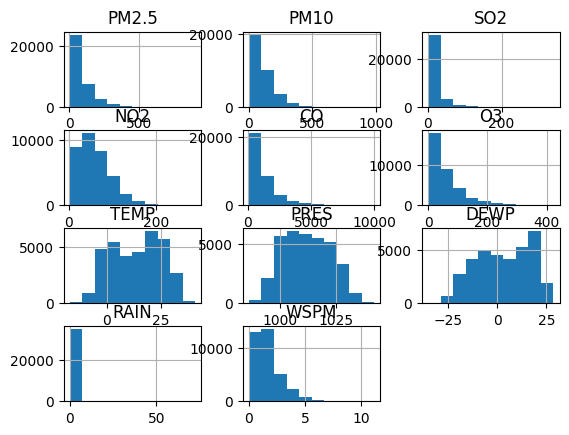

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.875198  0.479025  0.682795  0.786052 -0.160271 -0.122505   
PM10   0.875198  1.000000  0.469399  0.650040  0.682026 -0.141969 -0.109321   
SO2    0.479025  0.469399  1.000000  0.430005  0.523269 -0.206802 -0.352274   
NO2    0.682795  0.650040  0.430005  1.000000  0.687243 -0.495797 -0.232562   
CO     0.786052  0.682026  0.523269  0.687243  1.000000 -0.320600 -0.359192   
O3    -0.160271 -0.141969 -0.206802 -0.495797 -0.320600  1.000000  0.589316   
TEMP  -0.122505 -0.109321 -0.352274 -0.232562 -0.359192  0.589316  1.000000   
PRES  -0.008796 -0.035391  0.205117  0.074193  0.206537 -0.422749 -0.827183   
DEWP   0.123277  0.061443 -0.284395  0.072417 -0.096834  0.296920  0.823197   
RAIN  -0.013780 -0.027816 -0.041565 -0.039261 -0.016204  0.026881  0.036607   
WSPM  -0.275836 -0.179647 -0.112397 -0.487331 -0.275605  0.342127  0.037862   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.008796  0.123277 -0.013780 -0.275836  
PM10  -0.035391  0.061443 -0.027816 -0.179647  
SO2    0.205117 -0.284395 -0.041565 -0.112397  
NO2    0.074193  0.072417 -0.039261 -0.487331  
CO     0.206537 -0.096834 -0.016204 -0.275605  
O3    -0.422749  0.296920  0.026881  0.342127  
TEMP  -0.827183  0.823197  0.036607  0.037862  
PRES   1.000000 -0.776443 -0.060416  0.071479  
DEWP  -0.776443  1.000000  0.080772 -0.304990  
RAIN  -0.060416  0.080772  1.000000  0.022449  
WSPM   0.071479 -0.304990  0.022449  1.000000

wd
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       70.986438     94.788575     14.943066     44.206153   1156.990246   
min         2.000000      2.000000      0.285600      1.847700    100.000000   
25%        18.000000     34.000000      2.000000     22.000000    500.000000   
50%        46.000000     72.000000      7.000000     36.000000    800.000000   
75%       100.000000    131.000000     18.000000     60.000000   1400.000000   
max       882.000000    999.000000    310.000000    226.000000  10000.000000   
std        72.397726     83.928515     21.012174     29.502709   1122.612745   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       57.976253     13.671605   1007.771151      1.486924      0.060293   
min         0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%        16.000000      3.400000    999.300000    -10.300000      0.000000   
50%        46.000000     14.600000   1007.400000      1.700000      0.000000   
75%        80.000000     23.300000   1016.000000     14.200000      0.000000   
max       429.000000     41.400000   1036.500000     27.200000     52.100000   
std        54.258719     11.367457     10.226075     13.828895      0.752357   

           wd          WSPM    station             datetime  
count   35064  35064.000000      35064                35064  
unique     16           NaN          1                  NaN  
top       NNW           NaN  Changping                  NaN  
freq     4916           NaN      35064                  NaN  
mean      NaN      1.854871        NaN  2015-03-01 11:30:00  
min       NaN      0.000000        NaN  2013-03-01 00:00:00  
25%       NaN      1.000000        NaN  2014-03-01 05:45:00  
50%       NaN      1.500000        NaN  2015-03-01 11:30:00  
75%       NaN      2.300000        NaN  2016-02-29 17:15:00  
max       NaN     10.000000        NaN  2017-02-28 23:00:00  
std       NaN      1.310748        NaN                  NaN

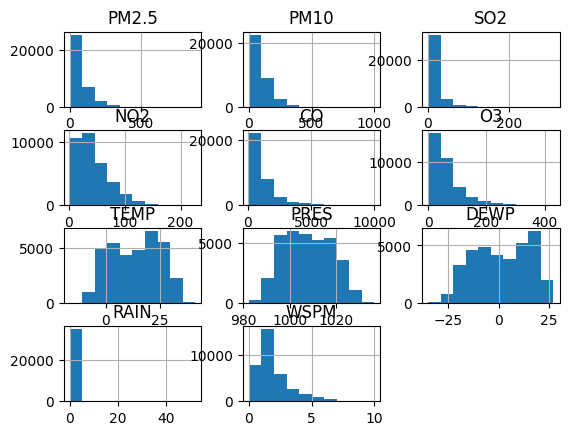

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.859519  0.462800  0.670569  0.742917 -0.104135 -0.113130   
PM10   0.859519  1.000000  0.426352  0.628669  0.653570 -0.052420 -0.091554   
SO2    0.462800  0.426352  1.000000  0.493051  0.517540 -0.190738 -0.353302   
NO2    0.670569  0.628669  0.493051  1.000000  0.714572 -0.469231 -0.359748   
CO     0.742917  0.653570  0.517540  0.714572  1.000000 -0.301951 -0.352507   
O3    -0.104135 -0.052420 -0.190738 -0.469231 -0.301951  1.000000  0.628131   
TEMP  -0.113130 -0.091554 -0.353302 -0.359748 -0.352507  0.628131  1.000000   
PRES   0.010915 -0.012868  0.265798  0.243244  0.223761 -0.494407 -0.837857   
DEWP   0.112217  0.035857 -0.323190 -0.148082 -0.107520  0.381071  0.823871   
RAIN  -0.008516 -0.020835 -0.038461 -0.043648 -0.012816  0.029316  0.035224   
WSPM  -0.270444 -0.130415 -0.101987 -0.328463 -0.273787  0.231738 -0.003754   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.010915  0.112217 -0.008516 -0.270444  
PM10  -0.012868  0.035857 -0.020835 -0.130415  
SO2    0.265798 -0.323190 -0.038461 -0.101987  
NO2    0.243244 -0.148082 -0.043648 -0.328463  
CO     0.223761 -0.107520 -0.012816 -0.273787  
O3    -0.494407  0.381071  0.029316  0.231738  
TEMP  -0.837857  0.823871  0.035224 -0.003754  
PRES   1.000000 -0.765785 -0.058798  0.087316  
DEWP  -0.765785  1.000000  0.090343 -0.314360  
RAIN  -0.058798  0.090343  1.000000  0.007380  
WSPM   0.087316 -0.314360  0.007380  1.000000

wd
NNW    4916
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35062.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       66.845557     84.113713     11.797849     27.305033    925.111838   
min         3.000000      2.000000      0.285600      1.026500    100.000000   
25%        14.000000     26.000000      2.000000      8.000000    300.000000   
50%        41.000000     60.000000      5.000000     19.000000    600.000000   
75%        94.000000    118.000000     15.000000     37.209870   1200.000000   
max       881.000000    905.000000    156.000000    205.000000  10000.000000   
std        73.445093     80.242081     15.652372     26.296890    894.687311   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       70.530792     13.671605   1007.771151      1.486924      0.060293   
min         0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%        31.000000      3.400000    999.300000    -10.300000      0.000000   
50%        62.000000     14.600000   1007.400000      1.700000      0.000000   
75%        91.000000     23.300000   1016.000000     14.200000      0.000000   
max       500.000000     41.400000   1036.500000     27.200000     52.100000   
std        58.624617     11.367457     10.226075     13.828895      0.752357   

           wd          WSPM   station             datetime  
count   35064  35064.000000     35064                35064  
unique     16           NaN         1                  NaN  
top       NNW           NaN  Dingling                  NaN  
freq     4916           NaN     35064                  NaN  
mean      NaN      1.854871       NaN  2015-03-01 11:30:00  
min       NaN      0.000000       NaN  2013-03-01 00:00:00  
25%       NaN      1.000000       NaN  2014-03-01 05:45:00  
50%       NaN      1.500000       NaN  2015-03-01 11:30:00  
75%       NaN      2.300000       NaN  2016-02-29 17:15:00  
max       NaN     10.000000       NaN  2017-02-28 23:00:00  
std       NaN      1.310748       NaN                  NaN

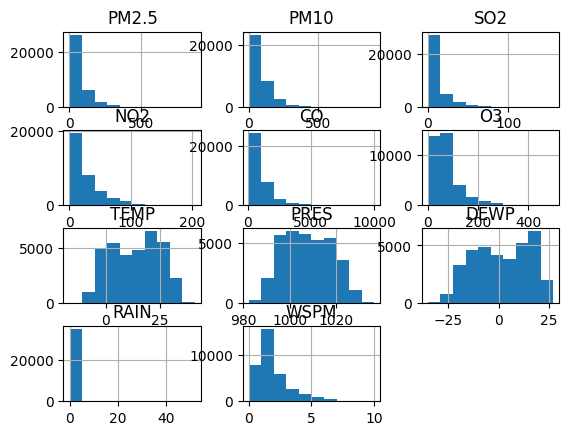

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.854997  0.474260  0.714023  0.775850 -0.094578 -0.088894   
PM10   0.854997  1.000000  0.453541  0.649545  0.668470 -0.020403 -0.055543   
SO2    0.474260  0.453541  1.000000  0.615622  0.521328 -0.187935 -0.316122   
NO2    0.714023  0.649545  0.615622  1.000000  0.781263 -0.350871 -0.309418   
CO     0.775850  0.668470  0.521328  0.781263  1.000000 -0.291617 -0.281221   
O3    -0.094578 -0.020403 -0.187935 -0.350871 -0.291617  1.000000  0.575507   
TEMP  -0.088894 -0.055543 -0.316122 -0.309418 -0.281221  0.575507  1.000000   
PRES  -0.005834 -0.039328  0.246140  0.196073  0.179596 -0.448177 -0.837857   
DEWP   0.135109  0.060597 -0.285467 -0.097164 -0.030329  0.329824  0.823871   
RAIN  -0.008102 -0.021639 -0.039560 -0.031166 -0.004450  0.025165  0.035224   
WSPM  -0.254722 -0.122692 -0.093232 -0.305338 -0.267643  0.244806 -0.003754   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.005834  0.135109 -0.008102 -0.254722  
PM10  -0.039328  0.060597 -0.021639 -0.122692  
SO2    0.246140 -0.285467 -0.039560 -0.093232  
NO2    0.196073 -0.097164 -0.031166 -0.305338  
CO     0.179596 -0.030329 -0.004450 -0.267643  
O3    -0.448177  0.329824  0.025165  0.244806  
TEMP  -0.837857  0.823871  0.035224 -0.003754  
PRES   1.000000 -0.765785 -0.058798  0.087316  
DEWP  -0.765785  1.000000  0.090343 -0.314360  
RAIN  -0.058798  0.090343  1.000000  0.007380  
WSPM   0.087316 -0.314360  0.007380  1.000000

wd
NNW    4916
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       86.144243    110.347617     18.506142     53.953078   1331.913045   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     38.000000      3.712800     27.000000    600.000000   
50%        61.000000     86.000000     10.000000     47.000000   1000.000000   
75%       119.000000    150.000000     24.000000     74.000000   1700.000000   
max       737.000000    955.000000    300.000000    258.000000  10000.000000   
std        86.260246     98.239918     22.954756     34.213245   1169.035307   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       57.700357     13.668250   1012.551871      2.445126      0.063983   
min         0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%        13.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        45.000000     14.600000   1012.200000      3.000000      0.000000   
75%        82.000000     23.500000   1020.900000     15.000000      0.000000   
max      1071.000000     41.100000   1042.000000     28.800000     46.400000   
std        58.327178     11.459735     10.266471     13.811939      0.786059   

           wd          WSPM station             datetime  
count   35064  35064.000000   35064                35064  
unique     16           NaN       1                  NaN  
top       ENE           NaN  Dongsi                  NaN  
freq     3939           NaN   35064                  NaN  
mean      NaN      1.860815     NaN  2015-03-01 11:30:00  
min       NaN      0.000000     NaN  2013-03-01 00:00:00  
25%       NaN      1.000000     NaN  2014-03-01 05:45:00  
50%       NaN      1.500000     NaN  2015-03-01 11:30:00  
75%       NaN      2.400000     NaN  2016-02-29 17:15:00  
max       NaN     10.500000     NaN  2017-02-28 23:00:00  
std       NaN      1.280427     NaN                  NaN

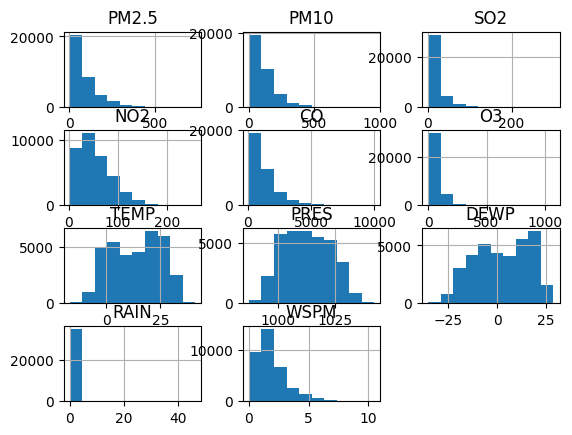

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.887971  0.550015  0.683746  0.771296 -0.135264 -0.138325   
PM10   0.887971  1.000000  0.497645  0.645455  0.698744 -0.124961 -0.134031   
SO2    0.550015  0.497645  1.000000  0.491734  0.561155 -0.159210 -0.342115   
NO2    0.683746  0.645455  0.491734  1.000000  0.679642 -0.458379 -0.269052   
CO     0.771296  0.698744  0.561155  0.679642  1.000000 -0.289342 -0.313094   
O3    -0.135264 -0.124961 -0.159210 -0.458379 -0.289342  1.000000  0.583826   
TEMP  -0.138325 -0.134031 -0.342115 -0.269052 -0.313094  0.583826  1.000000   
PRES  -0.005307 -0.015296  0.209707  0.113394  0.148599 -0.449326 -0.837532   
DEWP   0.128231  0.059223 -0.231706  0.036880 -0.031703  0.312867  0.819164   
RAIN  -0.019612 -0.031792 -0.045686 -0.043992 -0.015351  0.018075  0.038667   
WSPM  -0.301284 -0.195188 -0.168223 -0.483926 -0.319895  0.285827  0.048800   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.005307  0.128231 -0.019612 -0.301284  
PM10  -0.015296  0.059223 -0.031792 -0.195188  
SO2    0.209707 -0.231706 -0.045686 -0.168223  
NO2    0.113394  0.036880 -0.043992 -0.483926  
CO     0.148599 -0.031703 -0.015351 -0.319895  
O3    -0.449326  0.312867  0.018075  0.285827  
TEMP  -0.837532  0.819164  0.038667  0.048800  
PRES   1.000000 -0.770367 -0.065792  0.038617  
DEWP  -0.770367  1.000000  0.089336 -0.278875  
RAIN  -0.065792  0.089336  1.000000  0.025529  
WSPM   0.038617 -0.278875  0.025529  1.000000

wd
ENE    3939
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.897522    109.372349     17.609312     58.139298   1258.327045   
min         2.000000      2.000000      1.000000      2.000000    100.000000   
25%        23.000000     40.000000      3.000000     31.000000    500.000000   
50%        59.000000     89.000000      8.000000     51.000000    900.000000   
75%       114.000000    149.000000     22.000000     78.270244   1500.000000   
max       680.000000    999.000000    293.000000    270.000000  10000.000000   
std        81.070279     92.340966     23.631529     35.210206   1151.647467   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       54.817142     13.581414   1011.851650      3.120296      0.067383   
min         0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%         6.000000      3.100000   1003.300000     -8.100000      0.000000   
50%        40.000000     14.500000   1011.400000      3.800000      0.000000   
75%        80.000000     23.300000   1020.100000     15.600000      0.000000   
max       415.000000     40.500000   1042.000000     28.500000     72.500000   
std        57.199174     11.400426     10.404517     13.690314      0.909798   

           wd          WSPM   station             datetime  
count   35064  35064.000000     35064                35064  
unique     16           NaN         1                  NaN  
top        NE           NaN  Guanyuan                  NaN  
freq     5221           NaN     35064                  NaN  
mean      NaN      1.708577       NaN  2015-03-01 11:30:00  
min       NaN      0.000000       NaN  2013-03-01 00:00:00  
25%       NaN      0.900000       NaN  2014-03-01 05:45:00  
50%       NaN      1.400000       NaN  2015-03-01 11:30:00  
75%       NaN      2.200000       NaN  2016-02-29 17:15:00  
max       NaN     11.200000       NaN  2017-02-28 23:00:00  
std       NaN      1.204180       NaN                  NaN

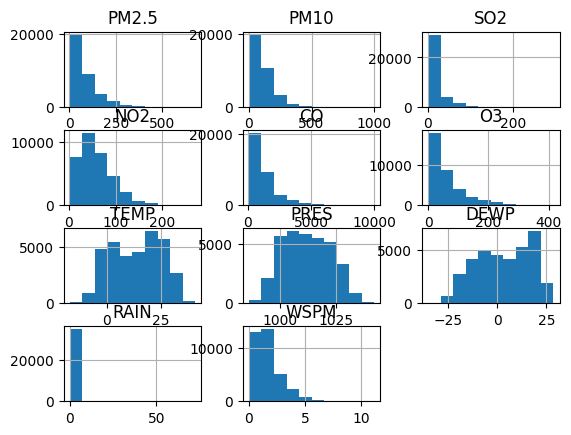

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.886022  0.494901  0.688364  0.786156 -0.147852 -0.132063   
PM10   0.886022  1.000000  0.465970  0.649267  0.700194 -0.107093 -0.089934   
SO2    0.494901  0.465970  1.000000  0.521432  0.551996 -0.187212 -0.360216   
NO2    0.688364  0.649267  0.521432  1.000000  0.718719 -0.508825 -0.322036   
CO     0.786156  0.700194  0.551996  0.718719  1.000000 -0.300855 -0.302347   
O3    -0.147852 -0.107093 -0.187212 -0.508825 -0.300855  1.000000  0.612862   
TEMP  -0.132063 -0.089934 -0.360216 -0.322036 -0.302347  0.612862  1.000000   
PRES  -0.000325 -0.050269  0.211667  0.148429  0.153008 -0.460984 -0.827183   
DEWP   0.121088  0.081972 -0.270389 -0.049350 -0.035428  0.342255  0.823197   
RAIN  -0.010613 -0.025489 -0.039844 -0.046678 -0.011129  0.023376  0.036607   
WSPM  -0.284217 -0.184675 -0.139100 -0.453884 -0.302230  0.307140  0.037862   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.000325  0.121088 -0.010613 -0.284217  
PM10  -0.050269  0.081972 -0.025489 -0.184675  
SO2    0.211667 -0.270389 -0.039844 -0.139100  
NO2    0.148429 -0.049350 -0.046678 -0.453884  
CO     0.153008 -0.035428 -0.011129 -0.302230  
O3    -0.460984  0.342255  0.023376  0.307140  
TEMP  -0.827183  0.823197  0.036607  0.037862  
PRES   1.000000 -0.776443 -0.060416  0.071479  
DEWP  -0.776443  1.000000  0.080772 -0.304990  
RAIN  -0.060416  0.080772  1.000000  0.022449  
WSPM   0.071479 -0.304990  0.022449  1.000000

wd
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35044.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       84.074802    119.261567     15.705821     55.851320   1338.100060   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        24.000000     45.000000      2.000000     26.000000    600.000000   
50%        60.000000    100.000000      7.000000     50.000000    985.714286   
75%       116.000000    167.000000     20.000000     79.000000   1680.652174   
max       770.000000    994.000000    500.000000    276.000000  10000.000000   
std        82.994634     97.533240     23.282583     36.512966   1214.044983   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       58.000001     13.855824   1008.835693      2.600351      0.064374   
min         0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%        10.000000      3.600000   1000.500000     -9.000000      0.000000   
50%        45.000000     14.800000   1008.500000      3.000000      0.000000   
75%        84.000000     23.500000   1017.000000     15.300000      0.000000   
max       450.000000     41.600000   1038.100000     27.400000     41.900000   
std        57.171816     11.294955     10.104302     13.790109      0.838142   

           wd          WSPM  station             datetime  
count   35064  35064.000000    35064                35064  
unique     16           NaN        1                  NaN  
top         N           NaN  Gucheng                  NaN  
freq     4108           NaN    35064                  NaN  
mean      NaN      1.343667      NaN  2015-03-01 11:30:00  
min       NaN      0.000000      NaN  2013-03-01 00:00:00  
25%       NaN      0.600000      NaN  2014-03-01 05:45:00  
50%       NaN      1.000000      NaN  2015-03-01 11:30:00  
75%       NaN      1.800000      NaN  2016-02-29 17:15:00  
max       NaN     12.000000      NaN  2017-02-28 23:00:00  
std       NaN      1.151055      NaN                  NaN

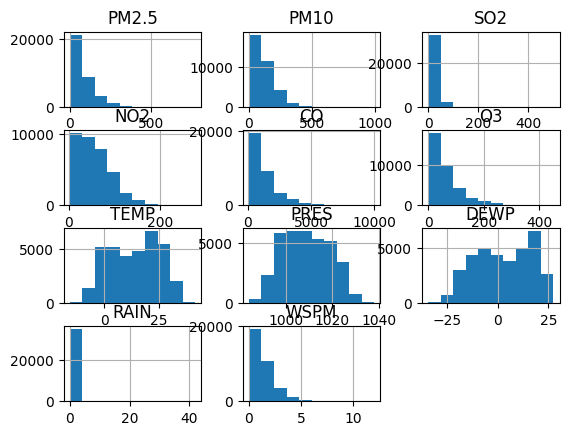

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.849306  0.414348  0.693133  0.757011 -0.178999 -0.145860   
PM10   0.849306  1.000000  0.379578  0.674388  0.624147 -0.125447 -0.057599   
SO2    0.414348  0.379578  1.000000  0.469363  0.509732 -0.197559 -0.356522   
NO2    0.693133  0.674388  0.469363  1.000000  0.704372 -0.505907 -0.258337   
CO     0.757011  0.624147  0.509732  0.704372  1.000000 -0.361000 -0.404132   
O3    -0.178999 -0.125447 -0.197559 -0.505907 -0.361000  1.000000  0.617816   
TEMP  -0.145860 -0.057599 -0.356522 -0.258337 -0.404132  0.617816  1.000000   
PRES   0.022596 -0.064551  0.231286  0.105506  0.239630 -0.461926 -0.832454   
DEWP   0.097060  0.094748 -0.315368  0.006514 -0.146313  0.335176  0.821663   
RAIN  -0.020184 -0.032008 -0.040623 -0.046401 -0.022101  0.023127  0.035969   
WSPM  -0.251702 -0.190391 -0.087071 -0.426076 -0.261832  0.269587 -0.046265   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.022596  0.097060 -0.020184 -0.251702  
PM10  -0.064551  0.094748 -0.032008 -0.190391  
SO2    0.231286 -0.315368 -0.040623 -0.087071  
NO2    0.105506  0.006514 -0.046401 -0.426076  
CO     0.239630 -0.146313 -0.022101 -0.261832  
O3    -0.461926  0.335176  0.023127  0.269587  
TEMP  -0.832454  0.821663  0.035969 -0.046265  
PRES   1.000000 -0.773286 -0.059145  0.130064  
DEWP  -0.773286  1.000000  0.084479 -0.364296  
RAIN  -0.059145  0.084479  1.000000  0.017300  
WSPM   0.130064 -0.364296  0.017300  1.000000

wd
N      4108
NE     3119
SSW    2762
NW     2758
NNE    2602
S      2343
W      2331
WNW    2073
SW     1993
ENE    1885
WSW    1621
NNW    1614
E      1607
SSE    1553
ESE    1353
SE     1342
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       69.501747     92.422670     12.446681     32.077275   1019.671871   
min         2.000000      2.000000      0.285600      1.026500    100.000000   
25%        17.000000     29.000000      2.000000     12.000000    400.000000   
50%        47.000000     69.000000      4.000000     25.000000    800.000000   
75%        98.000000    131.000000     14.000000     46.000000   1300.000000   
max       762.000000    993.000000    315.000000    231.000000  10000.000000   
std        70.990900     84.792119     19.361831     26.269586    890.539429   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       60.872173     12.430556   1007.612315      2.218761      0.067950   
min         0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%        19.000000      2.100000    999.400000     -9.700000      0.000000   
50%        50.000000     13.500000   1007.300000      2.700000      0.000000   
75%        84.000000     22.300000   1015.500000     15.300000      0.000000   
max       444.000000     40.300000   1036.500000     29.100000     45.900000   
std        55.620236     11.754318     10.025291     14.059918      0.848524   

           wd          WSPM  station             datetime  
count   35064  35064.000000    35064                35064  
unique     16           NaN        1                  NaN  
top        NW           NaN  Huairou                  NaN  
freq     5245           NaN    35064                  NaN  
mean      NaN      1.652772      NaN  2015-03-01 11:30:00  
min       NaN      0.000000      NaN  2013-03-01 00:00:00  
25%       NaN      0.900000      NaN  2014-03-01 05:45:00  
50%       NaN      1.300000      NaN  2015-03-01 11:30:00  
75%       NaN      2.000000      NaN  2016-02-29 17:15:00  
max       NaN     12.900000      NaN  2017-02-28 23:00:00  
std       NaN      1.200181      NaN                  NaN

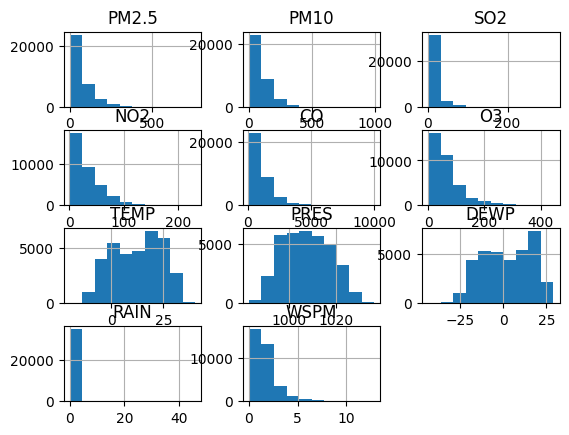

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.870223  0.402957  0.655697  0.798837 -0.059296 -0.077995   
PM10   0.870223  1.000000  0.417723  0.631408  0.693976  0.032514 -0.006681   
SO2    0.402957  0.417723  1.000000  0.530845  0.412996 -0.025059 -0.202598   
NO2    0.655697  0.631408  0.530845  1.000000  0.719401 -0.325986 -0.332826   
CO     0.798837  0.693976  0.412996  0.719401  1.000000 -0.239440 -0.258487   
O3    -0.059296  0.032514 -0.025059 -0.325986 -0.239440  1.000000  0.569287   
TEMP  -0.077995 -0.006681 -0.202598 -0.332826 -0.258487  0.569287  1.000000   
PRES  -0.005330 -0.077522  0.160298  0.224855  0.139701 -0.429542 -0.821039   
DEWP   0.121334  0.102664 -0.228366 -0.163251 -0.019980  0.291795  0.817572   
RAIN  -0.012069 -0.010879 -0.036148 -0.050016 -0.005781  0.024035  0.042713   
WSPM  -0.218516 -0.110507 -0.082801 -0.270670 -0.255886  0.265597  0.083876   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.005330  0.121334 -0.012069 -0.218516  
PM10  -0.077522  0.102664 -0.010879 -0.110507  
SO2    0.160298 -0.228366 -0.036148 -0.082801  
NO2    0.224855 -0.163251 -0.050016 -0.270670  
CO     0.139701 -0.019980 -0.005781 -0.255886  
O3    -0.429542  0.291795  0.024035  0.265597  
TEMP  -0.821039  0.817572  0.042713  0.083876  
PRES   1.000000 -0.762855 -0.065975 -0.002221  
DEWP  -0.762855  1.000000  0.087801 -0.258060  
RAIN  -0.065975  0.087801  1.000000  0.034352  
WSPM  -0.002221 -0.258060  0.034352  1.000000

wd
NW     5245
WNW    4876
NE     2252
E      2159
W      2138
SE     2113
ENE    2026
ESE    2022
SW     1797
NNE    1687
NNW    1663
SSE    1573
WSW    1468
N      1367
SSW    1350
S      1328
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       85.079472    109.384022     18.760102     58.095053   1327.767611   
min         2.000000      2.000000      0.571200      2.000000    100.000000   
25%        22.000000     38.000000      3.000000     29.000000    500.000000   
50%        59.000000     85.000000      9.000000     51.000000    900.000000   
75%       116.000000    149.000000     24.000000     80.000000   1600.000000   
max       844.000000    995.000000    257.000000    273.000000  10000.000000   
std        86.692516     96.088407     24.379948     36.380351   1257.098704   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       58.432876     13.668250   1012.551871      2.445126      0.063983   
min         0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%        10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        45.000000     14.600000   1012.200000      3.000000      0.000000   
75%        83.000000     23.500000   1020.900000     15.000000      0.000000   
max       390.000000     41.100000   1042.000000     28.800000     46.400000   
std        58.330590     11.459735     10.266471     13.811939      0.786059   

           wd          WSPM       station             datetime  
count   35064  35064.000000         35064                35064  
unique     16           NaN             1                  NaN  
top       ENE           NaN  Nongzhanguan                  NaN  
freq     3939           NaN         35064                  NaN  
mean      NaN      1.860815           NaN  2015-03-01 11:30:00  
min       NaN      0.000000           NaN  2013-03-01 00:00:00  
25%       NaN      1.000000           NaN  2014-03-01 05:45:00  
50%       NaN      1.500000           NaN  2015-03-01 11:30:00  
75%       NaN      2.400000           NaN  2016-02-29 17:15:00  
max       NaN     10.500000           NaN  2017-02-28 23:00:00  
std       NaN      1.280427           NaN                  NaN

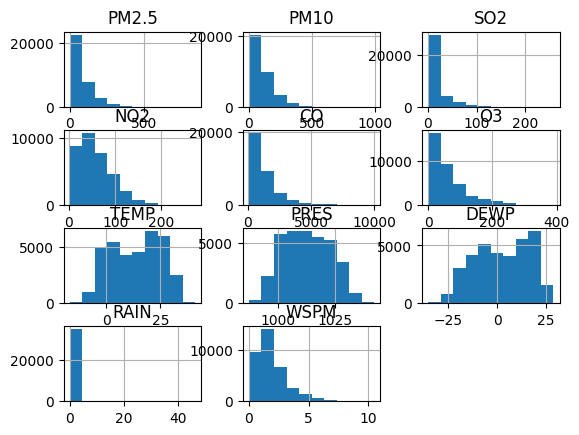

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.903852  0.536543  0.691340  0.813697 -0.187629 -0.173362   
PM10   0.903852  1.000000  0.524449  0.676476  0.741651 -0.160814 -0.145445   
SO2    0.536543  0.524449  1.000000  0.502287  0.563784 -0.192710 -0.360466   
NO2    0.691340  0.676476  0.502287  1.000000  0.702669 -0.521079 -0.302299   
CO     0.813697  0.741651  0.563784  0.702669  1.000000 -0.313067 -0.317610   
O3    -0.187629 -0.160814 -0.192710 -0.521079 -0.313067  1.000000  0.609599   
TEMP  -0.173362 -0.145445 -0.360466 -0.302299 -0.317610  0.609599  1.000000   
PRES   0.028121 -0.002061  0.232758  0.129807  0.149046 -0.457998 -0.837532   
DEWP   0.097226  0.050930 -0.265932 -0.018488 -0.017588  0.316142  0.819164   
RAIN  -0.022705 -0.033133 -0.045236 -0.051769 -0.013407  0.024020  0.038667   
WSPM  -0.301098 -0.205768 -0.155726 -0.467683 -0.338262  0.312668  0.048800   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.028121  0.097226 -0.022705 -0.301098  
PM10  -0.002061  0.050930 -0.033133 -0.205768  
SO2    0.232758 -0.265932 -0.045236 -0.155726  
NO2    0.129807 -0.018488 -0.051769 -0.467683  
CO     0.149046 -0.017588 -0.013407 -0.338262  
O3    -0.457998  0.316142  0.024020  0.312668  
TEMP  -0.837532  0.819164  0.038667  0.048800  
PRES   1.000000 -0.770367 -0.065792  0.038617  
DEWP  -0.770367  1.000000  0.089336 -0.278875  
RAIN  -0.065792  0.089336  1.000000  0.025529  
WSPM   0.038617 -0.278875  0.025529  1.000000

wd
ENE    3939
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       79.437962     99.271936     13.445971     44.094695   1197.904660   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        19.000000     31.000000      2.000000     20.000000    400.000000   
50%        55.000000     77.000000      5.000000     37.000000    900.000000   
75%       111.000000    139.000000     16.000000     62.000000   1500.000000   
max       941.000000    999.000000    239.000000    258.000000  10000.000000   
std        81.500282     90.579040     19.463506     30.907747   1162.920922   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       54.218810     13.375531   1013.071937      2.450821      0.061010   
min         0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%        10.000000      3.000000   1004.700000     -8.900000      0.000000   
50%        42.000000     14.400000   1012.800000      3.100000      0.000000   
75%        76.000000     23.200000   1021.000000     15.100000      0.000000   
max       351.716400     40.600000   1042.800000     27.500000     37.300000   
std        54.592684     11.484913     10.177512     13.732520      0.761118   

           wd          WSPM station             datetime  
count   35064  35064.000000   35064                35064  
unique     16           NaN       1                  NaN  
top       NNE           NaN  Shunyi                  NaN  
freq     5023           NaN   35064                  NaN  
mean      NaN      1.807784     NaN  2015-03-01 11:30:00  
min       NaN      0.000000     NaN  2013-03-01 00:00:00  
25%       NaN      1.000000     NaN  2014-03-01 05:45:00  
50%       NaN      1.500000     NaN  2015-03-01 11:30:00  
75%       NaN      2.300000     NaN  2016-02-29 17:15:00  
max       NaN     12.800000     NaN  2017-02-28 23:00:00  
std       NaN      1.287542     NaN                  NaN

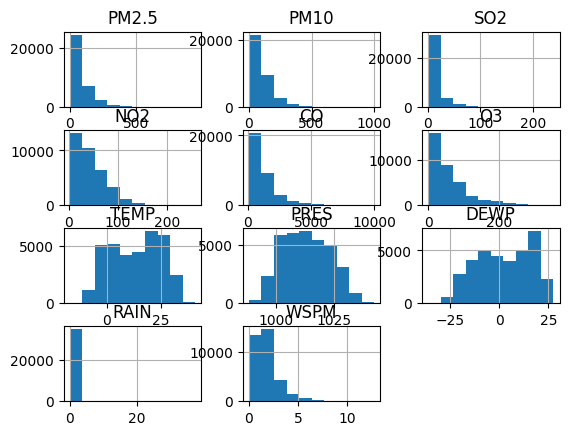

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.889705  0.461935  0.635951  0.776079 -0.126368 -0.120102   
PM10   0.889705  1.000000  0.462236  0.640850  0.696424 -0.107019 -0.085737   
SO2    0.461935  0.462236  1.000000  0.505000  0.502439 -0.138480 -0.314040   
NO2    0.635951  0.640850  0.505000  1.000000  0.653669 -0.413245 -0.295962   
CO     0.776079  0.696424  0.502439  0.653669  1.000000 -0.244020 -0.279106   
O3    -0.126368 -0.107019 -0.138480 -0.413245 -0.244020  1.000000  0.566882   
TEMP  -0.120102 -0.085737 -0.314040 -0.295962 -0.279106  0.566882  1.000000   
PRES   0.002149 -0.029982  0.217523  0.149024  0.133241 -0.418559 -0.825859   
DEWP   0.118777  0.082564 -0.262214 -0.080150 -0.020542  0.286705  0.823959   
RAIN  -0.008090 -0.023373 -0.038928 -0.051217 -0.003677  0.023954  0.039382   
WSPM  -0.268076 -0.189076 -0.122205 -0.382243 -0.285803  0.309847  0.062910   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.002149  0.118777 -0.008090 -0.268076  
PM10  -0.029982  0.082564 -0.023373 -0.189076  
SO2    0.217523 -0.262214 -0.038928 -0.122205  
NO2    0.149024 -0.080150 -0.051217 -0.382243  
CO     0.133241 -0.020542 -0.003677 -0.285803  
O3    -0.418559  0.286705  0.023954  0.309847  
TEMP  -0.825859  0.823959  0.039382  0.062910  
PRES   1.000000 -0.762659 -0.063945  0.016784  
DEWP  -0.762659  1.000000  0.087417 -0.256374  
RAIN  -0.063945  0.087417  1.000000  0.028889  
WSPM   0.016784 -0.256374  0.028889  1.000000

wd
NNE    5023
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.033097    106.537076     14.510018     53.258828   1305.333262   
min         3.000000      2.000000      0.571200      2.000000    100.000000   
25%        22.000000     41.000000      3.000000     28.000000    518.125000   
50%        58.000000     85.000000      7.000000     47.000000    900.000000   
75%       113.000000    144.000000     17.000000     71.000000   1600.000000   
max       821.000000    988.000000    273.000000    241.000000  10000.000000   
std        80.895489     90.277762     20.277493     32.016282   1179.450046   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       56.148077     13.668250   1012.551871      2.445126      0.063983   
min         0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%         8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        40.000000     14.600000   1012.200000      3.000000      0.000000   
75%        81.000000     23.500000   1020.900000     15.000000      0.000000   
max       674.000000     41.100000   1042.000000     28.800000     46.400000   
std        59.458361     11.459735     10.266471     13.811939      0.786059   

           wd          WSPM  station             datetime  
count   35064  35064.000000    35064                35064  
unique     16           NaN        1                  NaN  
top       ENE           NaN  Tiantan                  NaN  
freq     3939           NaN    35064                  NaN  
mean      NaN      1.860815      NaN  2015-03-01 11:30:00  
min       NaN      0.000000      NaN  2013-03-01 00:00:00  
25%       NaN      1.000000      NaN  2014-03-01 05:45:00  
50%       NaN      1.500000      NaN  2015-03-01 11:30:00  
75%       NaN      2.400000      NaN  2016-02-29 17:15:00  
max       NaN     10.500000      NaN  2017-02-28 23:00:00  
std       NaN      1.280427      NaN                  NaN

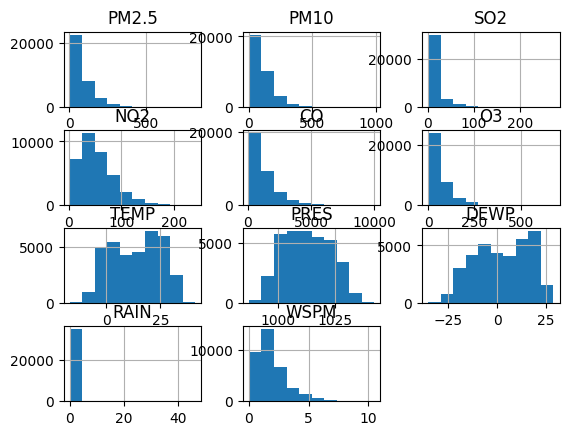

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.891320  0.394215  0.665639  0.800990 -0.169052 -0.152018   
PM10   0.891320  1.000000  0.383534  0.621454  0.716405 -0.118077 -0.119876   
SO2    0.394215  0.383534  1.000000  0.409860  0.404000 -0.054946 -0.233589   
NO2    0.665639  0.621454  0.409860  1.000000  0.715271 -0.535451 -0.324045   
CO     0.800990  0.716405  0.404000  0.715271  1.000000 -0.315250 -0.321220   
O3    -0.169052 -0.118077 -0.054946 -0.535451 -0.315250  1.000000  0.570747   
TEMP  -0.152018 -0.119876 -0.233589 -0.324045 -0.321220  0.570747  1.000000   
PRES   0.009322 -0.021701  0.169932  0.186279  0.156790 -0.423626 -0.837532   
DEWP   0.111542  0.056211 -0.227513 -0.082993 -0.038030  0.271213  0.819164   
RAIN  -0.015968 -0.028509 -0.038755 -0.047400 -0.014159  0.018126  0.038667   
WSPM  -0.291823 -0.174964 -0.042719 -0.412358 -0.326441  0.338906  0.048800   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.009322  0.111542 -0.015968 -0.291823  
PM10  -0.021701  0.056211 -0.028509 -0.174964  
SO2    0.169932 -0.227513 -0.038755 -0.042719  
NO2    0.186279 -0.082993 -0.047400 -0.412358  
CO     0.156790 -0.038030 -0.014159 -0.326441  
O3    -0.423626  0.271213  0.018126  0.338906  
TEMP  -0.837532  0.819164  0.038667  0.048800  
PRES   1.000000 -0.770367 -0.065792  0.038617  
DEWP  -0.770367  1.000000  0.089336 -0.278875  
RAIN  -0.065792  0.089336  1.000000  0.025529  
WSPM   0.038617 -0.278875  0.025529  1.000000

wd
ENE    3939
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       83.467612    110.707858     18.409514     65.668418   1328.761180   
min         2.000000      2.000000      0.285600      1.642400    100.000000   
25%        23.000000     40.000000      4.000000     36.543400    600.000000   
50%        59.000000     88.000000     10.000000     61.000000    900.000000   
75%       116.000000    153.000000     23.000000     89.000000   1600.000000   
max       957.000000    951.000000    282.000000    264.000000  10000.000000   
std        82.125058     93.539605     22.679906     37.966984   1263.218948   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       46.909375     13.425795   1011.102678      3.263752      0.068224   
min         0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%         3.000000      3.100000   1002.500000     -8.100000      0.000000   
50%        29.000000     14.300000   1010.800000      4.000000      0.000000   
75%        70.000000     22.900000   1019.400000     15.800000      0.000000   
max       364.000000     40.500000   1040.300000     28.500000     72.500000   
std        54.451718     11.348183     10.356118     13.679508      0.896471   

           wd          WSPM station             datetime  
count   35064  35064.000000   35064                35064  
unique     16           NaN       1                  NaN  
top        NE           NaN  Wanliu                  NaN  
freq     6826           NaN   35064                  NaN  
mean      NaN      1.501393     NaN  2015-03-01 11:30:00  
min       NaN      0.000000     NaN  2013-03-01 00:00:00  
25%       NaN      0.800000     NaN  2014-03-01 05:45:00  
50%       NaN      1.200000     NaN  2015-03-01 11:30:00  
75%       NaN      2.000000     NaN  2016-02-29 17:15:00  
max       NaN     11.200000     NaN  2017-02-28 23:00:00  
std       NaN      1.104645     NaN                  NaN

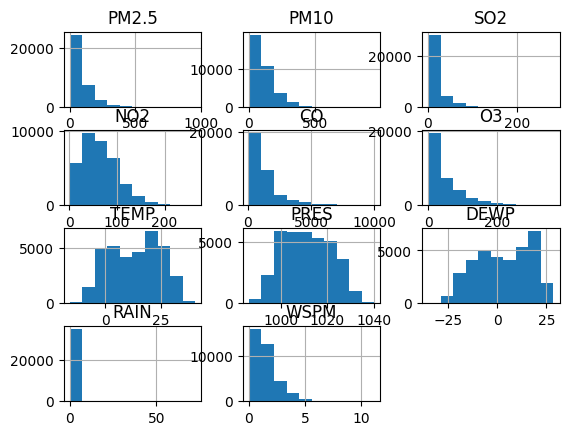

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879766  0.499420  0.668886  0.741242 -0.164539 -0.134334   
PM10   0.879766  1.000000  0.473739  0.672526  0.660757 -0.154583 -0.120524   
SO2    0.499420  0.473739  1.000000  0.528649  0.549066 -0.183827 -0.329961   
NO2    0.668886  0.672526  0.528649  1.000000  0.643297 -0.476170 -0.298594   
CO     0.741242  0.660757  0.549066  0.643297  1.000000 -0.316703 -0.399443   
O3    -0.164539 -0.154583 -0.183827 -0.476170 -0.316703  1.000000  0.605034   
TEMP  -0.134334 -0.120524 -0.329961 -0.298594 -0.399443  0.605034  1.000000   
PRES   0.006564 -0.019666  0.229839  0.130591  0.228724 -0.448535 -0.827722   
DEWP   0.101796  0.053856 -0.281554 -0.060592 -0.151306  0.315391  0.822960   
RAIN  -0.012708 -0.029368 -0.038438 -0.057363 -0.020580  0.024404  0.036742   
WSPM  -0.244713 -0.166081 -0.038671 -0.362035 -0.254117  0.306315  0.006832   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.006564  0.101796 -0.012708 -0.244713  
PM10  -0.019666  0.053856 -0.029368 -0.166081  
SO2    0.229839 -0.281554 -0.038438 -0.038671  
NO2    0.130591 -0.060592 -0.057363 -0.362035  
CO     0.228724 -0.151306 -0.020580 -0.254117  
O3    -0.448535  0.315391  0.024404  0.306315  
TEMP  -0.827722  0.822960  0.036742  0.006832  
PRES   1.000000 -0.779118 -0.060911  0.103788  
DEWP  -0.779118  1.000000  0.081784 -0.347433  
RAIN  -0.060911  0.081784  1.000000  0.009843  
WSPM   0.103788 -0.347433  0.009843  1.000000

wd
NE     6826
SW     4644
ENE    3642
NNE    3327
N      3219
WSW    2529
SSW    2101
NNW    1397
W      1335
E      1264
NW     1107
S       966
WNW     813
SE      707
SSE     615
ESE     572
Name: count, dtype: int64

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       85.067548    112.505795     17.363354     55.495402   1373.618569   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     39.000000      3.000000     28.000000    600.000000   
50%        60.000000     91.000000      8.000000     49.000000   1000.000000   
75%       116.000000    154.000000     21.000000     77.000000   1700.000000   
max       999.000000    961.000000    411.000000    251.000000   9800.000000   
std        85.999698     98.132120     24.171627     35.833026   1228.161525   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.919979     13.781808   1011.516205      2.705550      0.064285   
min         0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%         8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%        42.000000     14.800000   1011.000000      3.300000      0.000000   
75%        82.000000     23.500000   1020.000000     15.200000      0.000000   
max       358.000000     40.600000   1042.000000     28.500000     46.400000   
std        57.156365     11.386144     10.571152     13.705131      0.796766   

           wd          WSPM        station             datetime  
count   35064  35064.000000          35064                35064  
unique     16           NaN              1                  NaN  
top        NE           NaN  Wanshouxigong                  NaN  
freq     3647           NaN          35064                  NaN  
mean      NaN      1.745450            NaN  2015-03-01 11:30:00  
min       NaN      0.000000            NaN  2013-03-01 00:00:00  
25%       NaN      0.900000            NaN  2014-03-01 05:45:00  
50%       NaN      1.400000            NaN  2015-03-01 11:30:00  
75%       NaN      2.300000            NaN  2016-02-29 17:15:00  
max       NaN     13.200000            NaN  2017-02-28 23:00:00  
std       NaN      1.206461            NaN                  NaN

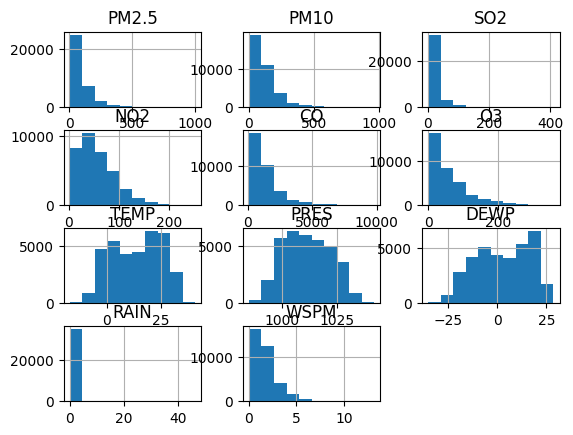

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.886600  0.502309  0.697233  0.813376 -0.194620 -0.185844   
PM10   0.886600  1.000000  0.504534  0.677723  0.735707 -0.146845 -0.146343   
SO2    0.502309  0.504534  1.000000  0.489754  0.558202 -0.190224 -0.355623   
NO2    0.697233  0.677723  0.489754  1.000000  0.742340 -0.520428 -0.309047   
CO     0.813376  0.735707  0.558202  0.742340  1.000000 -0.331974 -0.339264   
O3    -0.194620 -0.146845 -0.190224 -0.520428 -0.331974  1.000000  0.618409   
TEMP  -0.185844 -0.146343 -0.355623 -0.309047 -0.339264  0.618409  1.000000   
PRES   0.033790 -0.003036  0.206296  0.142016  0.167627 -0.454880 -0.828498   
DEWP   0.074192  0.041379 -0.289492 -0.028393 -0.051200  0.332672  0.817555   
RAIN  -0.020684 -0.033835 -0.042728 -0.047344 -0.015993  0.024152  0.039019   
WSPM  -0.298422 -0.230682 -0.138180 -0.475279 -0.338315  0.317749  0.061364   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.033790  0.074192 -0.020684 -0.298422  
PM10  -0.003036  0.041379 -0.033835 -0.230682  
SO2    0.206296 -0.289492 -0.042728 -0.138180  
NO2    0.142016 -0.028393 -0.047344 -0.475279  
CO     0.167627 -0.051200 -0.015993 -0.338315  
O3    -0.454880  0.332672  0.024152  0.317749  
TEMP  -0.828498  0.817555  0.039019  0.061364  
PRES   1.000000 -0.770045 -0.063393  0.054139  
DEWP  -0.770045  1.000000  0.088307 -0.278064  
RAIN  -0.063393  0.088307  1.000000  0.030869  
WSPM   0.054139 -0.278064  0.030869  1.000000

wd
NE     3647
SW     3428
ENE    3080
E      2807
WNW    2565
NW     2552
WSW    2546
W      2464
SSW    2457
ESE    1772
NNE    1564
S      1506
SE     1279
NNW    1187
N      1176
SSE    1034
Name: count, dtype: int64

In [80]:
for i, data in stasiun.items():
    display(HTML(f"<h2 style='text-align:center'>Stasiun {i}</h2>"))
    display(HTML(f"<h3>Deskripsi Statistik</h3>"))
    display(data.describe(include="all"))
    display(HTML(f"<h3>Histogram untuk Data Kontinu</h3>"))
    data[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].hist()
    plt.show()
    display(HTML(f"<h3>Korelasi antar Data Kontinu</h3>"))
    display(data[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].corr())
    display(HTML(f"<h3>Data Arah Mata Angin (wd)</h3>"))
    display(data.wd.value_counts())



**Insights:**
- Dilihat dari histogram, masing masing data untuk setiap stasiun, memiliki pola titik kumpul yang sama, meskipun dengan distribusi yang berbeda. Dan juga dapat dilihat bahwa tidak adanya outlier, semuanya berkumpul di suatu titik, tidak ada yang berpencar.

- Dilihat dari korelasi, Hubungan antara PM2.5 dan PM10 bernilai positif, emang dasarnya hanya berbeda ukuran aja, yang satu <=2.5 mikrometer, yang satunya <=10 mikro meter

- Korelasi antara konsentrasi yang terkaandung dengan konsentrasi partikel (PM), seperti SO2, NO2, Co, dan O3. Terlihat untuk SO2, NO2, CO bernilai positif, menunjukkan hubungan yang positif linear antara kandungan (SO2, NO2, CO) dengan Konsentrasi (PM), namun untuk O3 bernilai negatif.

- Korelasi antara parameter cuaca (TEMP, PRES, DEWP, RAIN), terlihat nilai korelasi antara (TEMP, RAIN) bernilai negatif, yang artinya nilainya berkorelasi negatif/ berlawanan dengan nilai (PM). Namun disini (DEWP) atau titik embun bernilai positif korelasinya. nah untuk PRES, ini berbeda-beda untuk setiap stasiun, ada yng positif dan negatif, terlihat dari nilainya yang kecil 0,00 sekian, artinya PRES ini tidak ada korelasinya sebenarnya,

- Korelasi antara parameter angin (WSPM), kecepatan angin berkorelasi negatif dengan (PM), artinya semakin kecil WSPM,maka semakin besar PM, dan sebaliknya semakin besar WSPM, semakin kecil PM.

### Data setiap stasiun berdasarkan tahun dan bulan pengamatan

In [81]:
for i, data in stasiun.items():
    buffer = io.StringIO()
    html_code = f"""
    <details>
        <summary><h2 style='display: inline; cursor: pointer;'>{i}</h2></summary>

        <h3>Statistik berdasarkan bulan</h3>
        {data.groupby(["year","month"]).agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2": "mean",
            "NO2": ["mean", "max", "min"],
            "CO": ["mean", "max", "min"],
            "O3": ["mean", "max", "min"],
            "TEMP": ["max", "min"],
            "PRES": ["max", "min"],
            "DEWP": ["max", "min"],
            "RAIN": "mean",
            "WSPM": "mean",
        }).to_html()}

        <h3>Arah Angin Dominan berdasarkan bulan</h3>
        {data.groupby(["year","month"])["wd"].agg(lambda x: x.value_counts().idxmax()).to_frame().to_html()}

    </details>
    """
    display(HTML(html_code))


**Insights:**
<details>
<summary>Stasiun Aotizhongxin</summary>
PM2.5 tertinggi di Desember (102,7) dan terendah di Agustus (55,8). PM10 tertinggi di Maret (150,5) dan terendah di Agustus (72,1). SO2 tertinggi di Januari (34,9) dan terendah di Agustus (4,4). NO2 tertinggi di Oktober (74,6) dan terendah di Juli (47,7). CO tertinggi di Januari (217,0) dan terendah di Juli (177,0). O3 tertinggi di Mei (342,0) dan terendah di Desember (82,0). Suhu maksimum tertinggi di Mei (40,5) dan terendah di Januari (14,0). Tekanan udara tertinggi di Januari (1042,0) dan terendah di Juni (987,5). Kelembapan tertinggi di Juli (27,3) dan terendah di Januari (0,9). Curah hujan tertinggi di Juli (0,267) dan terendah di Januari (0,0003). Arah angin dominan NE, kecuali April-Mei SW dan November ENE.
</details>

<details>
<summary>Stasiun Changping</summary>
PM2.5 tertinggi di Desember (87,3) dan terendah di Agustus (46,8). PM10 tertinggi di Maret (130,1) dan terendah di Agustus (63,3). SO2 tertinggi di Januari (32,2) dan terendah di Agustus (4,4). NO2 tertinggi di Desember (61,2) dan terendah di Juli (27,0). CO tertinggi di Desember (226,0) dan terendah di Juli (117,0). O3 tertinggi di Juli (429,0) dan terendah di Desember (72,0). Suhu maksimum tertinggi di Mei (41,4) dan terendah di Januari (12,4). Tekanan udara tertinggi di Januari (1036,5) dan terendah di Mei (982,4). Kelembapan tertinggi di Juli (26,9) dan terendah di Januari (-1,3). Curah hujan tertinggi di Juli (0,258) dan terendah di Januari (0,0002). Arah angin dominan NNW sepanjang tahun, kecuali Desember WNW.
</details>

<details>
<summary>Stasiun Dingling</summary>
PM2.5 tertinggi di Oktober (84,8) dan terendah di Agustus (43,4). PM10 tertinggi di Maret (120,2) dan terendah di Agustus (55,1). SO2 tertinggi di Januari (23,6) dan terendah di Juli (4,1). NO2 tertinggi di Desember (43,5) dan terendah di Agustus (13,4). CO tertinggi di Januari dan November (~190,3) dan terendah di Juli dan Agustus (69,0). O3 tertinggi di Juli (500,0) dan terendah di Januari (95,0). Suhu maksimum tertinggi di Mei (41,4) dan terendah di Januari (12,4). Tekanan udara tertinggi di Januari (1036,5) dan terendah di Mei (982,4). Kelembapan tertinggi di Juli (26,9) dan terendah di Januari (-1,3). Curah hujan tertinggi di Juli (0,258) dan terendah di Januari (0,0002). Arah angin dominan NNW sepanjang tahun, kecuali Desember WNW.
</details>

<details>
<summary>Stasiun Dongsi</summary>
PM2.5 tertinggi di Desember (113,1) dan terendah di Agustus (58,5). PM10 tertinggi di Maret (143,6) dan terendah di Agustus (73,6). SO2 tertinggi di Januari (33,4) dan terendah di Agustus (6,1). NO2 tertinggi di Oktober (68,2) dan terendah di Agustus (40,9). CO tertinggi di Maret (258,0) dan terendah di Juli (139,2). O3 tertinggi di Januari (500,0) dan terendah di Desember (76,0). Suhu maksimum tertinggi di Mei (41,1) dan terendah di Januari (11,4). Tekanan udara tertinggi di Januari (1042,0) dan terendah di Mei (987,5). Kelembapan tertinggi di Juni (25,0) dan terendah di Januari (-35,3). Curah hujan tertinggi di Juli (0,262) dan terendah di Januari (0,0003). Arah angin dominan NE hampir sepanjang tahun, kecuali April dan Mei SW, serta Juni dan Juli E.
</details>

<details>
<summary>Stasiun Guanyuan</summary>
PM2.5 tertinggi di Desember (110,6) dan terendah di Agustus (58,5). PM10 tertinggi di Maret (136,3) dan terendah di Agustus (76,1). SO2 tertinggi di Januari (34,8) dan terendah di Agustus (5,0). NO2 tertinggi di Desember (76,2) dan terendah di Juli (41,1). CO tertinggi di Maret (270,0) dan terendah di Agustus (144,0). O3 tertinggi di Januari (415,0) dan terendah di Desember (68,0). Suhu maksimum tertinggi di Mei (40,5) dan terendah di Januari (14,0). Tekanan udara tertinggi di Januari (1042,0) dan terendah di Mei (987,5). Kelembapan tertinggi di Juli (27,3) dan terendah di Januari (-35,3). Curah hujan tertinggi di Juli (0,267) dan terendah di Januari (0,0003). Arah angin dominan NE hampir sepanjang tahun, kecuali April dan Mei SW, serta November ENE.
</details>

<details>
<summary>Stasiun Gucheng</summary>
PM2.5 tertinggi terjadi pada bulan Desember (110,2) dan terendah di Agustus (54,7). PM10 mencapai nilai tertinggi di Maret (153,0) dan terendah di Agustus (87,0). SO2 tercatat paling tinggi di Januari (33,8) dan paling rendah di Agustus (3,1). NO2 memiliki konsentrasi tertinggi di Desember (71,0) dan terendah di Agustus (39,6). CO tertinggi tercatat di Januari (276,0) dan terendah di Juli (142,0). O3 mencapai puncaknya di Maret (450,0) dan titik terendahnya di Januari (2,0). Suhu maksimum tertinggi terjadi di Mei (41,6) dan terendah di Januari (12,6). Tekanan udara tertinggi tercatat di Januari (1038,1) dan terendah di Mei (984,0). Kelembapan tertinggi terjadi di Agustus (27,4) dan terendah di Januari (-34,6). Curah hujan tertinggi terjadi di Juli (0,281) dan terendah di Januari (0,000). Arah angin dominan NW pada Januari, N pada Februari, NE pada Maret, SSW pada April dan Mei, kembali N pada Juni hingga Oktober, N pada November, serta WNW pada Desember.
</details>

<details>
<summary>Stasiun Huairou</summary>
PM2.5 tertinggi terjadi pada bulan Maret (88,9) dan terendah di Agustus (47,8). PM10 mencapai nilai tertinggi di Maret (121,8) dan terendah di Agustus (64,9). SO2 tercatat paling tinggi di Januari (22,6) dan paling rendah di Agustus (3,5). NO2 memiliki konsentrasi tertinggi di Desember (46,2) dan terendah di Agustus (17,0). CO tertinggi tercatat di Maret (219,0) dan terendah di Juli (82,0). O3 mencapai puncaknya di Juli (413,0) dan titik terendahnya di Januari (94,0). Suhu maksimum tertinggi terjadi di Mei (40,3) dan terendah di Januari (11,2). Tekanan udara tertinggi tercatat di Januari (1036,5) dan terendah di Mei (982,8). Kelembapan tertinggi terjadi di Agustus (29,1) dan terendah di Desember (-43,4). Curah hujan tertinggi terjadi di Juli (0,301) dan terendah di Januari (0,001). Arah angin dominan NW pada Januari, Februari, September, November, dan Desember, serta WNW pada Maret hingga Oktober.
</details>

<details>
<summary>Stasiun Nongzhanguan</summary>
PM2.5 tertinggi terjadi pada bulan Desember (117,86) dan terendah di Agustus (54,98). PM10 mencapai nilai tertinggi di Desember (140,47) dan terendah di Juni (88,35). SO2 tercatat paling tinggi di Januari (36,87) dan paling rendah di Agustus (5,01). NO2 memiliki konsentrasi tertinggi di Desember (77,20) dan terendah di Juli (41,50). CO tertinggi tercatat di Maret (273,0) dan terendah di Juli (176,0). O3 mencapai puncaknya di Agustus (390,0) dan titik terendahnya di Januari (95,0). Suhu maksimum tertinggi terjadi di Mei (41,1) dan terendah di Januari (11,4). Tekanan udara tertinggi tercatat di Januari (1042,0) dan terendah di Juni (990,1). Kelembapan tertinggi terjadi di Agustus (28,8) dan terendah di November (-30,2). Curah hujan tertinggi terjadi di Juli (0,262) dan terendah di Januari (0,0003). Arah angin dominan NE pada Januari, Februari, September, dan Oktober, ENE pada Maret, Agustus, November, dan Desember, SW pada April dan Mei, serta E pada Juni dan Juli.
</details>

<details>
<summary>Stasiun Shunyi</summary>
PM2.5 tertinggi di Desember (97,5) dan terendah di Agustus (53,3). PM10 tertinggi di Maret (130,9) dan terendah di Agustus (68,2). SO2 tertinggi di Januari (27,2) dan terendah di Agustus (3,5). NO2 tertinggi di Desember (57,1) dan terendah di Juli (28,2). CO tertinggi di Januari (258,0) dan terendah di Juli (128,0). O3 tertinggi di Juli (351,7) dan terendah di Desember (83,0). Suhu maksimum tertinggi di Mei (40,6) dan terendah di Januari (12,0). Tekanan udara tertinggi di Januari (1042,8) dan terendah di Juni (990,8). Kelembapan tertinggi di Juli (26,9) dan terendah di Januari (-36,0). Curah hujan tertinggi di Juli (0,249) dan terendah di Januari (0,0005). Arah angin dominan NNE, kecuali April–Juli (S, SSE).
</details>

<details>
<summary>Stasiun Tiantan</summary>
PM2.5 tertinggi di Desember (113,3) dan terendah di Agustus (56,4). PM10 tertinggi di Desember (138,1) dan terendah di Agustus (71,2). SO2 tertinggi di Januari (27,5) dan terendah di Juli (5,9). NO2 tertinggi di Desember (73,1) dan terendah di Mei (41,5). CO tertinggi di Desember (238,0) dan terendah di Agustus (124,0). O3 tertinggi di Oktober (276,0) dan terendah di Januari (93,0). Suhu maksimum tertinggi di Mei (41,1) dan terendah di Januari (11,4). Tekanan udara tertinggi di Januari (1042,0) dan terendah di Juli (987,1). Kelembapan tertinggi di Agustus (28,8) dan terendah di Januari (-35,3). Curah hujan tertinggi di Juli (0,262) dan terendah di Januari (0,0003). Arah angin dominan NE, kecuali April–Juli (SW, E).
</details>

<details>
<summary>Stasiun Wanliu</summary>
PM2.5 tertinggi di Desember (110,7) dan terendah di Agustus (56,3). PM10 tertinggi di Desember (132,3) dan terendah di Agustus (78,3). SO2 tertinggi di Januari (35,5) dan terendah di Juli (7,2). NO2 tertinggi di Desember (76,9) dan terendah di Juli (47,7). CO tertinggi di Februari (264,0) dan terendah di Agustus (168,0). O3 tertinggi di Oktober (241,0) dan terendah di Januari (93,0). Suhu maksimum tertinggi di Mei (40,5) dan terendah di Januari (14,0). Tekanan udara tertinggi di Januari (1040,3) dan terendah di Juli (985,9). Kelembapan tertinggi di Agustus (28,5) dan terendah di Januari (-34,9). Curah hujan tertinggi di Juli (0,285) dan terendah di Januari (0,0001). Arah angin dominan NE sepanjang tahun, kecuali April–Mei (SW).
</details>

<details>
<summary>Stasiun Wanshouxigong</summary>

</details>

### Data berdasarkan Stasiun

In [82]:
mergestasiun = {
    stasiun: eval(stasiun)[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3",
                            "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]].mean()
    for stasiun in ["aotizhongxin", "changping", "dingling", "dongsi", "guanyuan",
                    "gucheng", "huairou", "nongzhanguan", "shunyi", "tiantan",
                    "wanliu", "wanshouxigong"]
}

datamergestasiun = pd.DataFrame(mergestasiun).T
for col in datamergestasiun.columns:
    max_station = datamergestasiun[col].idxmax()
    max_value = datamergestasiun[col].max()
    min_station = datamergestasiun[col].idxmin()
    min_value = datamergestasiun[col].min()

    print(f"Stasiun dengan {col} tertinggi: {max_station}, dengan nilai {col}: {max_value}")
    print(f"Stasiun dengan {col} terendah: {min_station}, dengan nilai {col}: {min_value}")


Stasiun dengan PM2.5 tertinggi: dongsi, dengan nilai PM2.5: 86.14424338352727
Stasiun dengan PM2.5 terendah: dingling, dengan nilai PM2.5: 66.84555669632671
Stasiun dengan PM10 tertinggi: gucheng, dengan nilai PM10: 119.26156741957564
Stasiun dengan PM10 terendah: dingling, dengan nilai PM10: 84.11371349532284
Stasiun dengan SO2 tertinggi: nongzhanguan, dengan nilai SO2: 18.760102292950034
Stasiun dengan SO2 terendah: dingling, dengan nilai SO2: 11.797848596851471
Stasiun dengan NO2 tertinggi: wanliu, dengan nilai NO2: 65.6684183307666
Stasiun dengan NO2 terendah: dingling, dengan nilai NO2: 27.305032595117222
Stasiun dengan CO tertinggi: wanshouxigong, dengan nilai CO: 1373.618568902578
Stasiun dengan CO terendah: dingling, dengan nilai CO: 925.1118383527264
Stasiun dengan O3 tertinggi: dingling, dengan nilai O3: 70.53079199463838
Stasiun dengan O3 terendah: wanliu, dengan nilai O3: 46.90937508555783
Stasiun dengan TEMP tertinggi: gucheng, dengan nilai TEMP: 13.855824022278949
Stasiun

**Insight:**
- Didapat dari data berdasarkan stasiun, dengan merata-ratakan setiap parameter pada masing-masing stasiun, kemudian dicari nilai maksimal setiap parameter berdasarkan stasiun. Didapat rata rata terbesar setiap parameter berdasarkan stasiun:
  * PM2.5 : Dongsi
  * PM10 : Gucheng
  * SO2 : Nongzhanguan
  * NO2 : Wanliu
  * CO : Wanshouxigong
  * O3 : Dingling
  * TEMP : Gucheng
  * PRES : Shunyi
  * DEWP : Wanliu
  * RAIN : Wanliu
  * WSPM : Dongsi

  Kemudian dicari nilai minimum setiap parameter berdasarkan stasiun. Didapat rata rata terkecil setiap parameter berdasarkan stasiun:
  * PM2.5 : Dingling
  * PM10 : Dingling
  * SO2 : Dingling
  * NO2 : Dingling
  * CO : Dingling
  * O3 : Wanliu
  * TEMP : Huairou
  * PRES : Huairou
  * DEWP : Changping
  * RAIN : Changping
  * WSPM : Gucheng

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Perubahan Setiap Parameter Kualitas Udara di Setiap Stasiun?

#### Paramater Kualitas Udara berdasarkan Konsentrasi Partikel (PM2.5 dan PM 10)

<details>
  <summary> Penjelasan </summary>
  <ul>
    <li>PM2.5 (Particulate Matter ≤ 2.5µm): Konsentrasi partikel udara berukuran ≤ 2.5 mikrometer.</li>
    <li>PM10 (Particulate Matter ≤ 10µm): Konsentrasi partikel udara berukuran ≤ 10 mikrometer.</li>
</details>

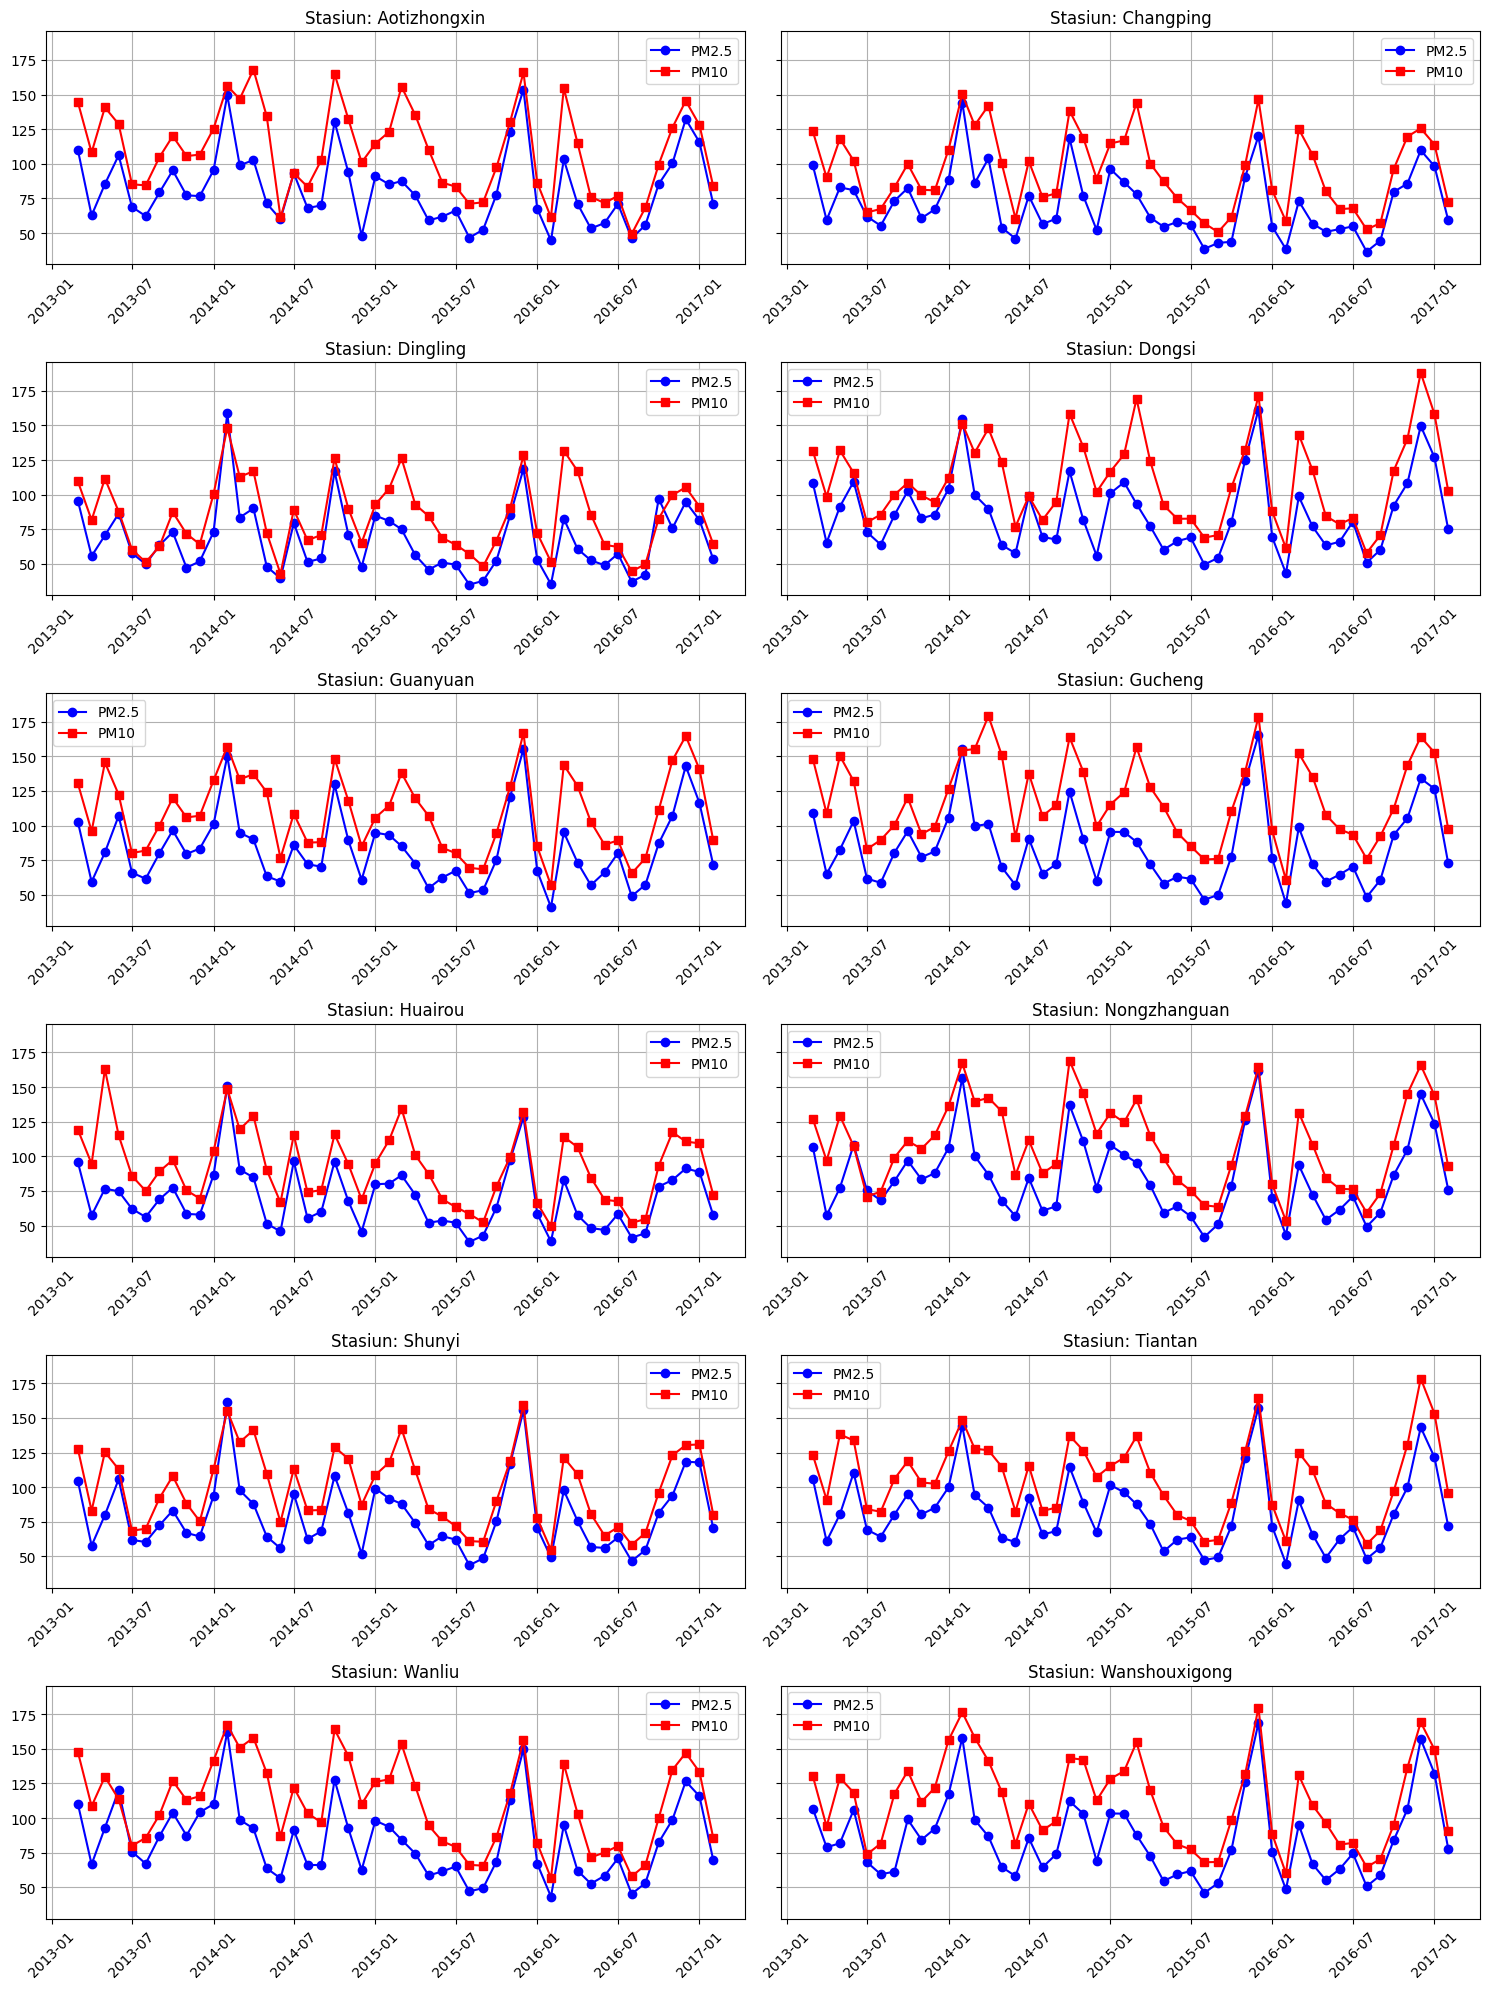

In [83]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20), sharey=True)
axes = axes.flatten()

for i, (station, data) in enumerate(stasiun.items()):
    agg_data = data.groupby(["year", "month"]).agg({
        "PM2.5": "mean",
        "PM10": "mean"
    }).reset_index()
    agg_data["date"] = pd.to_datetime(agg_data[["year", "month"]].assign(day=1))

    axes[i].plot(agg_data["date"], agg_data["PM2.5"], marker='o', linestyle='-', label="PM2.5", color='b')
    axes[i].plot(agg_data["date"], agg_data["PM10"], marker='s', linestyle='-', label="PM10", color='r')
    axes[i].set_title(f"Stasiun: {station}")
    axes[i].grid(True)
    axes[i].legend()

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Insights:**
<details>
<summary> Stasiun Aotizhongxin </summary>
<p>Polusi PM2.5 dan PM10 memiliki pola musiman, dengan lonjakan yang lebih tinggi di awal tahun,Konsentrasi PM10 lebih tinggi daripada PM2.5, tetapi keduanya menunjukkan fluktuasi serupa (bergerak dalam pola yang mirip, yang menunjukkan bahwa kedua polutan ini cenderung meningkat dan menurun bersama). Dari grafik tidak dapat dilihat adanya tren yang signifikan, rata rata nilai PM2.5 atau PM10 cenderung tidak naik/turun (stabil) dari tahun ke tahun.</p>
</details>

<details>
<summary> Stasiun Changpin </summary>
<p>Stasiun Changping juga menunjukkan pola fluktuasi polusi yang mirip dengan Aotizhongxin, dengan lonjakan tajam pada awal tahun 2014 dan 2016. Konsentrasi PM10 selalu lebih tinggi daripada PM2.5, dengan pola peningkatan di musim dingin dan penurunan di pertengahan tahun. Fluktuasi yang terjadi mengindikasikan bahwa faktor musiman berperan besar dalam perubahan tingkat polusi udara di wilayah ini.</p>
</details>

<details>
<summary> Stasiun Dingling </summary>
<p>Polusi PM2.5 dan PM10 yang cukup konsisten dari tahun ke tahun. Konsentrasi polutan mengalami peningkatan signifikan di awal tahun 2014 dan awal 2016. Setelah lonjakan tersebut, terjadi penurunan tajam. Secara umum, tidak ada tren kenaikan atau penurunan jangka panjang, tetapi terdapat pola musiman yang berulang.</p>
</details>

<details>
<summary> Stasiun Dongsi </summary>
<p>Data dari stasiun Dongsi menunjukkan pola fluktuasi yang serupa dengan Dingling, tetapi dengan kadar polusi yang sedikit lebih tinggi, terutama pada tahun 2016. Peningkatan tajam juga tampak di awal 2014 dan awal 2016.</p>
</details>

<details>
<summary> Stasiun Guanyuan </summary>
<p>Stasiun Guanyuan menunjukkan pola fluktuasi dengan beberapa lonjakan drastis, terutama pada awal tahun 2014 dan awal 2016. Pola ini menyerupai stasiun lainnya, yang menunjukkan bahwa faktor musiman berperan besar dalam perubahan kadar PM2.5 dan PM10. Secara umum, tidak ada tren naik atau turun yang signifikan dalam jangka panjang, tetapi terdapat pola berulang yang menunjukkan bahwa kondisi polusi cenderung memburuk pada waktu-waktu tertentu setiap tahunnya.</p>
</details>

<details>
<summary> Stasiun Gucheng </summary>
<p>Stasiun Gucheng memiliki pola fluktuasi yang lebih ekstrem dibandingkan stasiun lainnya, dengan beberapa lonjakan yang sangat tinggi pada awal 2014 dan awal 2016. Seperti pada stasiun lainnya, pola musiman sangat jelas, dengan peningkatan polusi di musim dingin dan penurunan setelahnya.</p>
</details>

<details>
<summary> Stasiun Huairou </summary>
<p>Di stasiun Huairou, pola PM2.5 dan PM10 menunjukkan fluktuasi yang cukup konsisten dari tahun ke tahun, dengan lonjakan tinggi pada awal tahun 2014 dan 2016. Tidak terdapat tren jangka panjang yang jelas, tetapi pola musiman terlihat cukup dominan, terutama dengan lonjakan polusi pada awal tahun.</p>
</details>

<details>
<summary> Stasiun Nongzhanguan </summary>
<p>Stasiun Nongzhanguan memiliki tingkat polusi yang relatif tinggi dibandingkan dengan stasiun lainnya. Lonjakan signifikan terjadi pada awal tahun 2014 dan 2016, yang menunjukkan pola musiman yang berulang. Tren jangka panjang tidak begitu terlihat, namun ada periode dengan konsentrasi polusi lebih stabil di pertengahan tahun.</p>
</details>

<details>
<summary> Stasiun Shunyi </summary>
<p>Pola fluktuasi di stasiun Shunyi mirip dengan stasiun lainnya, dengan lonjakan drastis pada awal tahun 2014 dan 2016. Terlihat bahwa konsentrasi PM2.5 dan PM10 memiliki pola yang hampir bersamaan, menandakan sumber polusi yang serupa. Tidak ada tren peningkatan atau penurunan jangka panjang yang signifikan, tetapi pola musiman yang berulang cukup terlihat dari tahun ke tahun.</p>
</details>

<details>
<summary> Stasiun Tiantan </summary>
<p>Stasiun Tiantan menunjukkan pola fluktuasi yang lebih beragam, dengan beberapa lonjakan polusi yang cukup tinggi, terutama di awal tahun 2014 dan awal 2016. Meski demikian, ada periode dengan konsentrasi polutan yang relatif lebih rendah, terutama di pertengahan tahun. Seperti stasiun lainnya, tren jangka panjang tidak terlihat jelas, tetapi fluktuasi tahunan menunjukkan adanya faktor musiman yang kuat dalam perubahan kadar polusi.</p>
</details>

<details>
<summary> Stasiun Wanliu </summary>
<p>Di stasiun Wanliu, pola konsentrasi PM2.5 dan PM10 menunjukkan fluktuasi musiman yang jelas. Lonjakan signifikan terjadi pada awal tahun 2014 dan 2016, dengan kecenderungan peningkatan polusi di musim dingin. Konsentrasi PM10 umumnya lebih tinggi dibandingkan PM2.5, yang menunjukkan bahwa partikel polutan berukuran lebih besar juga berkontribusi terhadap pencemaran udara di wilayah ini. Meskipun ada variasi bulanan, pola tahunan cenderung berulang, dengan tingkat polusi lebih rendah di pertengahan tahun.</p>
</details>

<details>
<summary> Stasiun Wanshouxigong </summary>
<p>Stasiun Wanshouxigong memiliki pola fluktuasi polusi yang serupa dengan Wanliu, dengan lonjakan tajam terutama pada awal tahun 2014 dan 2016. Namun, di stasiun ini, fluktuasi PM10 lebih besar dibandingkan PM2.5, menunjukkan bahwa konsentrasi partikel kasar lebih dominan. Periode musim dingin mengalami peningkatan tajam dalam tingkat polusi, sementara pertengahan tahun cenderung lebih stabil dengan penurunan konsentrasi polutan.</p>
</details>

#### Parameter Kualitas udara berdasarkan Kandungan Partikel (SO2, NO2, CO, dan O3)
<details>
  <summary>Penjelasan</summary>
  <ul>
    <li>SO2 (Sulfur Dioxide): Gas yang dihasilkan dari pembakaran bahan bakar fosil.</li>
    <li>NO2 (Nitrogen Dioxide): Gas polutan dari kendaraan dan industri.</li>
    <li>CO (Carbon Monoxide): Gas beracun yang dihasilkan dari pembakaran tidak sempurna bahan bakar.</li>
    <li>O3 (Ozone): Ozon di troposfer.</li>
  </ul>
</details>


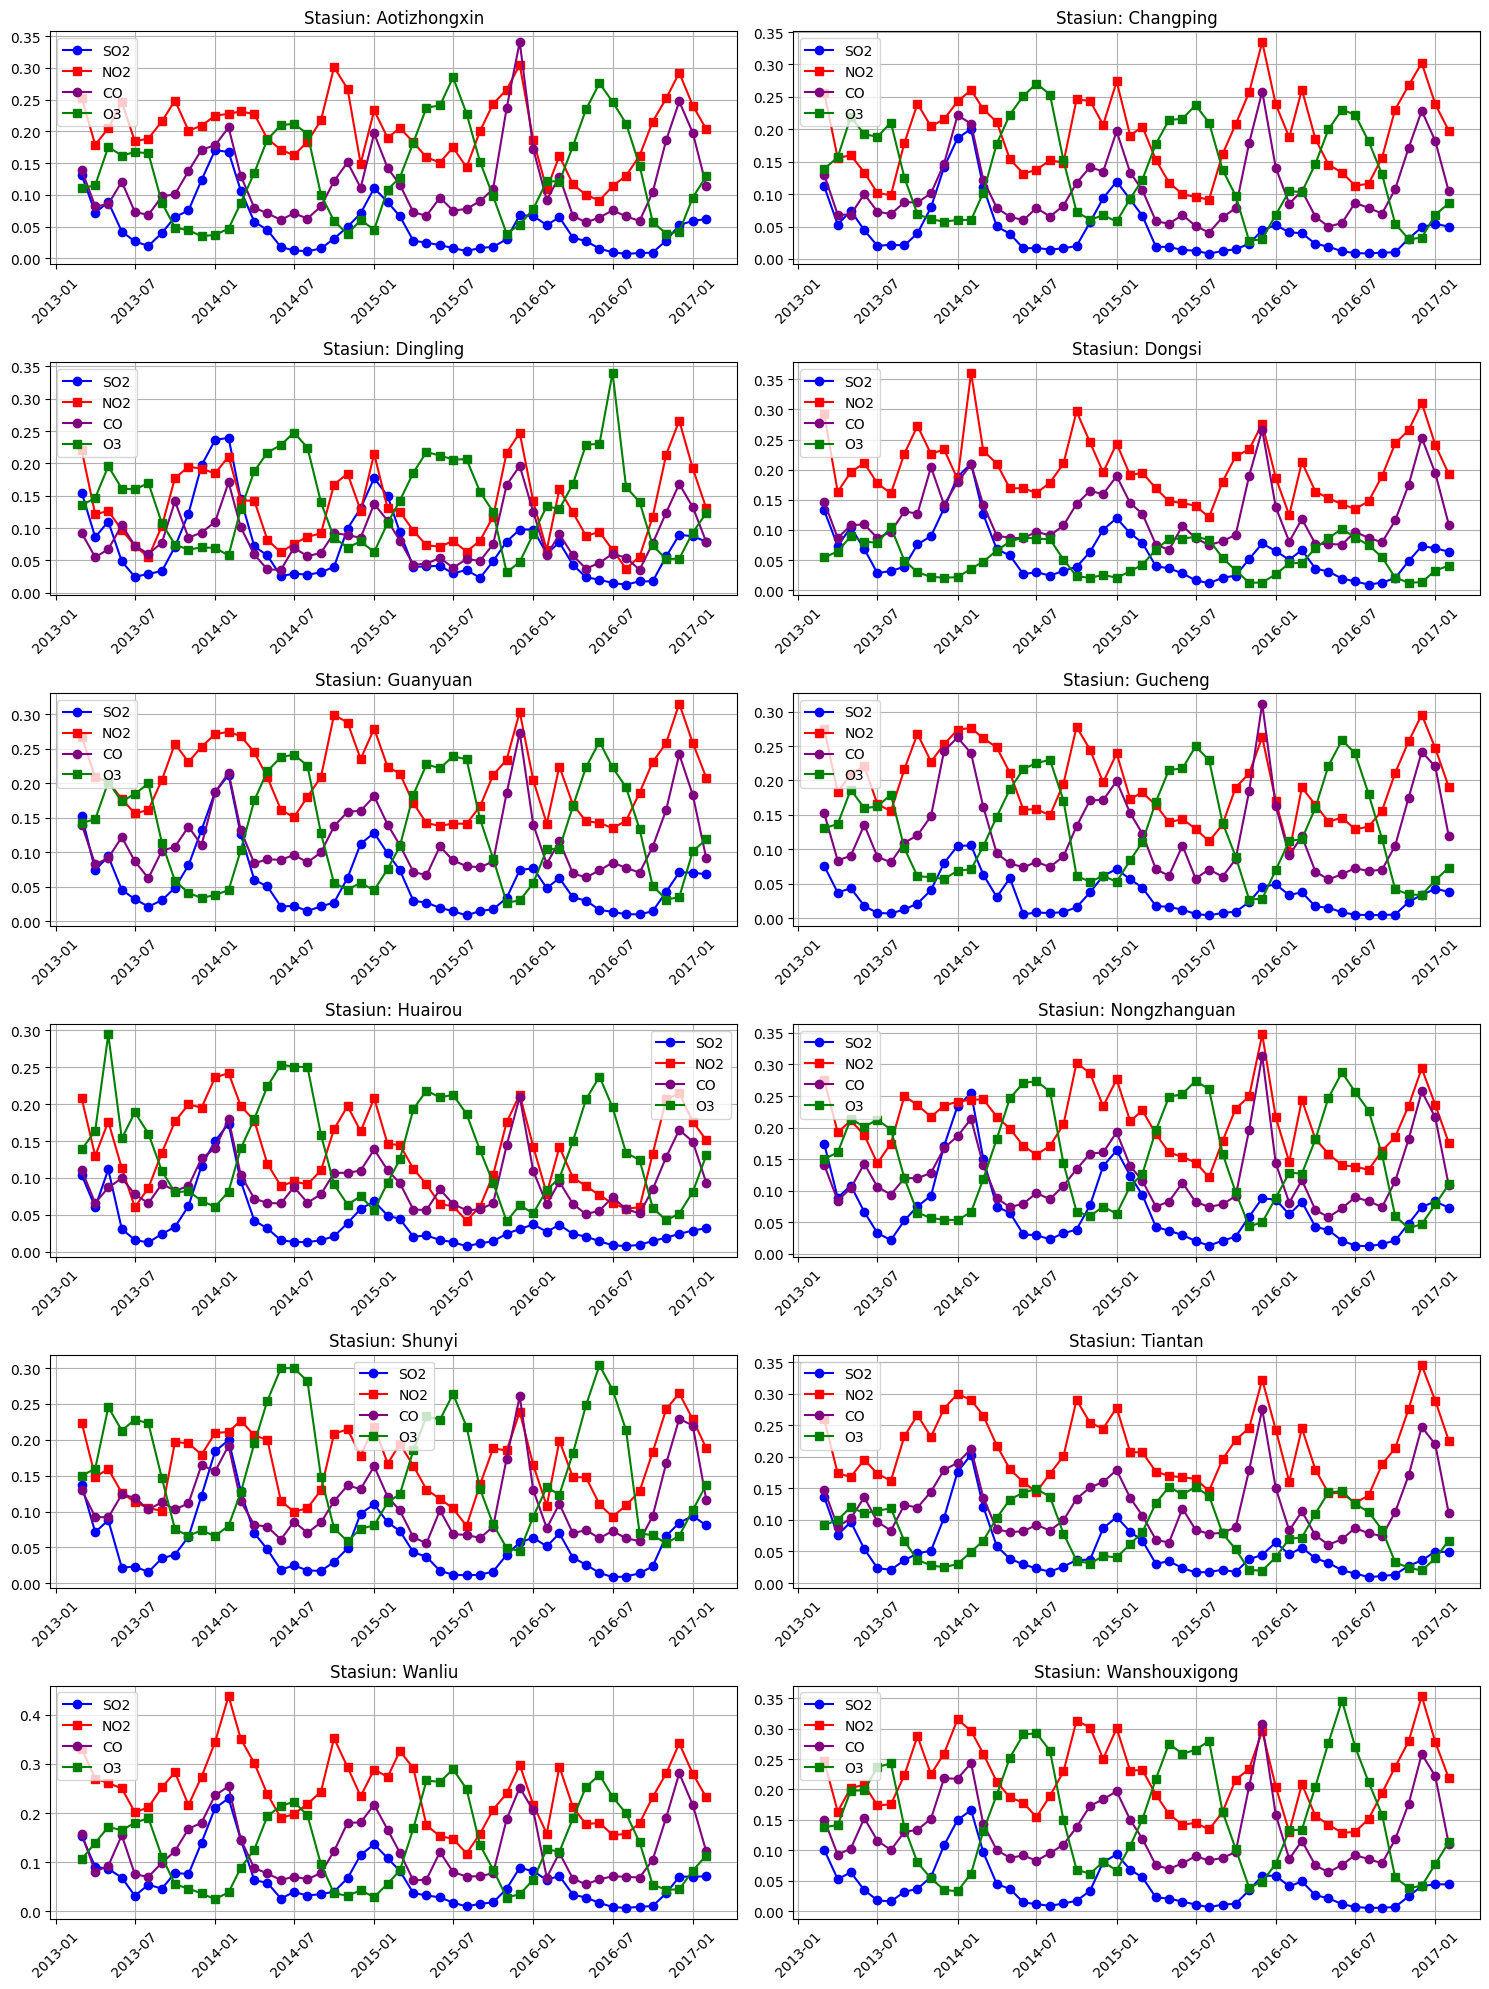

In [84]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (station, data) in enumerate(stasiun.items()):
    scaler = MinMaxScaler()
    data[["SO2", "NO2", "CO", "O3"]] = scaler.fit_transform(data[["SO2", "NO2", "CO", "O3"]])
    agg_data = data.groupby(["year", "month"]).agg({
        "SO2": "mean",
        "NO2": "mean",
        "CO": "mean",
        "O3": "mean",
    }).reset_index()

    agg_data["date"] = pd.to_datetime(agg_data[["year", "month"]].assign(day=1))
    axes[i].plot(agg_data["date"], agg_data["SO2"], marker='o', linestyle='-', label="SO2", color='b')
    axes[i].plot(agg_data["date"], agg_data["NO2"], marker='s', linestyle='-', label="NO2", color='r')
    axes[i].plot(agg_data["date"], agg_data["CO"], marker='o', linestyle='-', label="CO", color='purple')
    axes[i].plot(agg_data["date"], agg_data["O3"], marker='s', linestyle='-', label="O3", color='green')
    axes[i].set_title(f"Stasiun: {station}")
    axes[i].grid(True)
    axes[i].legend()

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Insights:**
Karena yang ingin dilihat adalah **tren perubahan**, dan nilai dari data SO2, NO2, CO, O3 berbeda beda, ada yang besar dan kecil. Perubahan berarti perpindahan dari nilai awal ke nilai akhir, bila CO satuannya ribuan, dan SO2 hanya ratusan, akan memengaruhi nilai perubahannya, oleh karena itu diperlukannya normalisasi.
<details>
<summary>Stasiun Aotizhongxin</summary>
<p>Pada stasiun Aotizhongxin, konsentrasi NO₂ menunjukkan pola naik-turun dengan beberapa puncak, terutama pada Januari 2016 (~0.30) dan Desember 2016 (~0.27). SO₂ cenderung lebih rendah dibanding polutan lainnya, dengan nilai terendah sekitar pertengahan 2014 (~0.03) dan kenaikan kecil di awal 2016 (~0.15). CO mengalami lonjakan tajam pada Januari 2016 (~0.28) dan tetap fluktuatif sepanjang periode. O₃ memiliki tren berbeda, dengan peningkatan bertahap yang mencapai puncaknya pada Juni 2016 (~0.22) sebelum kembali menurun.</p>
</details>

<details>
<summary>Stasiun Changping</summary>
<p>Di stasiun Changping, pola perubahan NO₂ mirip dengan Aotizhongxin, dengan konsentrasi tertinggi terjadi pada Januari 2016 (~0.32) dan Desember 2016 (~0.28). SO₂ tetap rendah sepanjang periode dengan nilai terendah pertengahan 2014 (~0.02) dan sedikit peningkatan pada awal 2016 (~0.13). CO mengalami lonjakan yang cukup signifikan pada Januari 2016 (~0.26), sementara O₃ mencapai puncak sekitar Juni 2016 (~0.25), menunjukkan tren kenaikan sebelum menurun kembali.</p>
</details>

<details>
<summary>Stasiun Dingling</summary>
<p>Pada stasiun Dingling, konsentrasi NO₂ lebih rendah dibanding dua stasiun sebelumnya tetapi masih menunjukkan pola yang sama, dengan puncak di Januari 2016 (~0.27) dan Desember 2016 (~0.25). SO₂ berada di level terendah sepanjang 2014 (~0.02) dan mengalami kenaikan kecil di awal 2016 (~0.12). CO mengalami puncak di Januari 2016 (~0.22), sementara O₃ memiliki pola peningkatan bertahap dan mencapai nilai tertinggi sekitar Juni 2016 (~0.27) sebelum kembali turun.</p>
</details>

<details>
<summary>Stasiun Dongsi</summary>
<p>Di stasiun Dongsi, pola NO₂ kembali mirip dengan stasiun lain, dengan puncak pada Januari 2016 (~0.34) dan Desember 2016 (~0.28). SO₂ tetap rendah sepanjang 2014 (~0.02) dan meningkat sedikit di awal 2016 (~0.14). CO menunjukkan tren yang mirip dengan lonjakan Januari 2016 (~0.26). O₃ memiliki tren kenaikan hingga puncak pada Juni 2016 (~0.20) sebelum turun kembali.</p>
</details>

<details>
<summary>Stasiun Guanyuan</summary>
<p>Pada stasiun Guanyuan, konsentrasi NO₂ menunjukkan fluktuasi yang cukup jelas dengan puncak tertinggi pada Januari 2016 (~0.30) dan Desember 2016 (~0.28). SO₂ memiliki nilai lebih rendah dibanding polutan lain, dengan titik terendah sekitar pertengahan 2014 (~0.02) dan kenaikan kecil pada awal 2016 (~0.10). CO mengalami lonjakan signifikan pada Januari 2016 (~0.27), sementara O₃ memiliki tren yang berbeda, dengan puncak tertinggi di pertengahan 2016 (~0.22) sebelum menurun kembali.</p>
</details>

<details>
<summary>Stasiun Gucheng</summary>
<p>Pada stasiun Gucheng, tren NO₂ mirip dengan Guanyuan, dengan puncak konsentrasi di Januari 2016 (~0.29) dan Desember 2016 (~0.27). SO₂ tetap rendah, dengan titik terendah di pertengahan 2014 (~0.02) dan kenaikan kecil pada awal 2016 (~0.12). CO menunjukkan lonjakan besar di Januari 2016 (~0.32), lebih tinggi dibanding stasiun lainnya. O₃ mengalami tren peningkatan yang mencapai puncak pertengahan 2016 (~0.23) sebelum turun kembali.</p>
</details>

<details>
<summary>Stasiun Huairou</summary>
<p>Pada stasiun Huairou, NO₂ mengalami tren fluktuatif tetapi tidak setinggi di dua stasiun sebelumnya, dengan puncak tertinggi di Januari 2016 (~0.22) dan Desember 2016 (~0.21). SO₂ tetap lebih rendah dibanding polutan lain, dengan titik terendah di pertengahan 2014 (~0.02) dan kenaikan kecil pada awal 2016 (~0.10). CO mengalami puncak signifikan pada Januari 2016 (~0.20), sedangkan O₃ memiliki pola yang cukup berbeda, dengan lonjakan besar di pertengahan 2013 (~0.30) dan pertengahan 2016 (~0.25).
</p>
</details>

<details>
<summary>Stasiun Nongzhanguan</summary>
<p>Di stasiun Nongzhanguan, NO₂ menunjukkan pola fluktuatif dengan puncak pada Januari 2016 (~0.31) dan Desember 2016 (~0.28). SO₂ tetap lebih rendah dibandingkan polutan lainnya, dengan titik terendah di pertengahan 2014 (~0.02) dan kenaikan kecil pada awal 2016 (~0.12). CO mengalami lonjakan besar pada Januari 2016 (~0.28), sementara O₃ menunjukkan tren yang meningkat hingga pertengahan 2016 (~0.22) sebelum kembali menurun.</p>
</details>

<details>
<summary>Stasiun Shunyi</summary>
<p>Pada stasiun Shunyi, konsentrasi NO₂ mengalami fluktuasi dengan puncak tertinggi pada Januari 2016 (~0.28) dan Desember 2016 (~0.27). SO₂ tetap lebih rendah dibandingkan polutan lain, dengan titik terendah pertengahan 2014 (~0.02) dan kenaikan kecil pada awal 2016 (~0.10). CO mengalami lonjakan signifikan pada Januari 2016 (~0.26), sementara O₃ memiliki tren yang berbeda dengan puncak tertinggi pertengahan 2016 (~0.30) sebelum kembali menurun.</p>
</details>

<details>
<summary>Stasiun Tiantan</summary>
<p>Pada stasiun Tiantan, NO₂ menunjukkan tren serupa dengan puncak tertinggi pada Januari 2016 (~0.33). SO₂ memiliki nilai lebih rendah dibandingkan polutan lain, dengan titik terendah pertengahan 2014 (~0.02) dan kenaikan kecil awal 2016 (~0.12). CO menunjukkan lonjakan besar pada Januari 2016 (~0.28), sedangkan O₃ memiliki pola meningkat pertengahan tahun sebelum menurun kembali.</p>
</details>

<details>
<summary>Stasiun Wanliu</summary>
<p>Pada stasiun Wanliu, NO₂ mengalami fluktuasi tetapi memiliki puncak lebih tinggi dibandingkan stasiun lain, dengan nilai tertinggi pada Januari 2016 (~0.42). SO₂ tetap lebih rendah dibandingkan polutan lain, dengan titik terendah pertengahan 2014 (~0.02) dan kenaikan kecil awal 2016 (~0.12). CO mengalami puncak signifikan Januari 2016 (~0.30), sementara O₃ memiliki tren kenaikan pertengahan 2016 (~0.25).</p>
</details>

<details>
<summary>Stasiun Wanshouxigong</summary>
<p>Di stasiun Wanshouxigong, NO₂ menunjukkan pola fluktuatif dengan puncak pada Januari 2016 (~0.30) dan Desember 2016 (~0.27). SO₂ tetap lebih rendah dibandingkan polutan lain, dengan titik terendah pertengahan 2014 (~0.02) dan kenaikan kecil awal 2016 (~0.12). CO mengalami lonjakan besar Januari 2016 (~0.26), sementara O₃ menunjukkan tren meningkat hingga pertengahan 2016 (~0.23) sebelum kembali menurun.</p>
</details>

### Pertanyaan 2:  Bagaimana Pengaruh Faktor Parameter Cuaca seperti suhu (TEMP), curah hujan (RAIN), Tekanan udara (PRES), dan Titik embun (DEWP) terhadap kualitas udara di setiap stasiun?

#### Pengaruh Suhu (TEMP) dan Curah Hujan (RAIN) terhadap Kualitas Udara dengan Parameter Konsentrasi Partikel 2.5 (PM2.5)

<details>
  <summary>Penjelasan</summary>
  Suhu Udara (TEMP), menggunakan rata rata TEMP setiap bulannya, untuk masing-masing stasiun. Begitupula untuk Curah Hujan (RAIN), menggunakan rata rata RAIN setiap bulannya, untuk masing masing stasiun. Untuk Parameter kualitas udara yang digunakan adalah PM2.5 atau onsentrasi partikel udara berukuran ≤ 2.5 mikrometer.
</details>

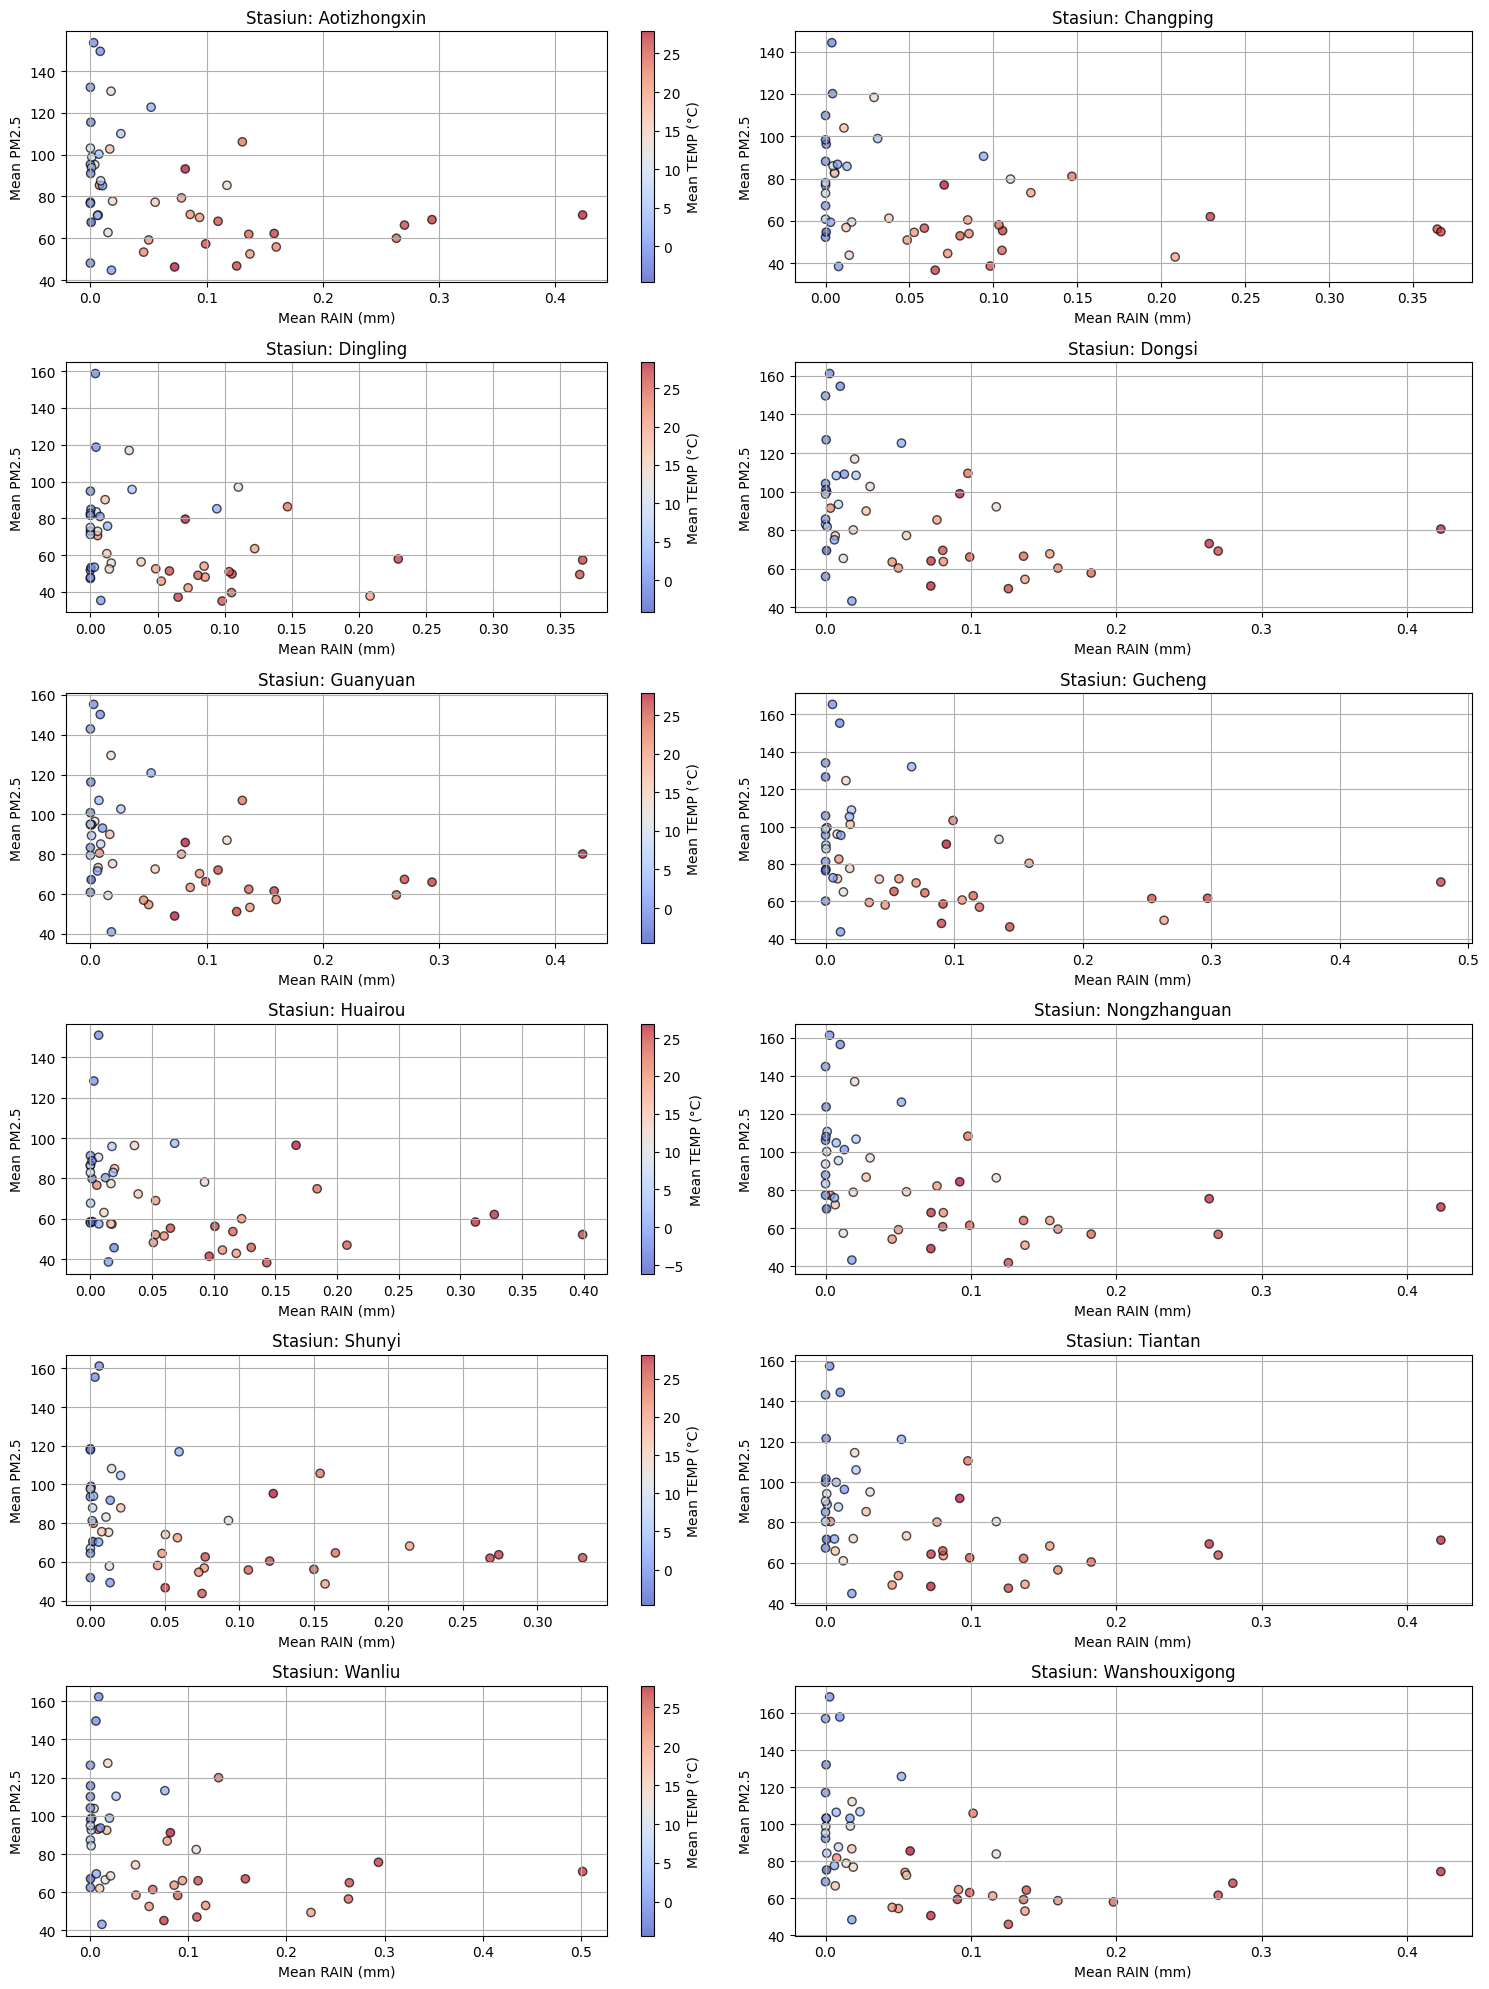

In [85]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (station, data) in enumerate(stasiun.items()):
    agg_data = data.groupby(["year", "month"]).agg({
        "PM2.5": "mean",
        "RAIN": "mean",
        "TEMP": "mean"
    }).reset_index()

    sc = axes[i].scatter(agg_data["RAIN"], agg_data["PM2.5"],
                         c=agg_data["TEMP"], cmap='coolwarm', alpha=0.7, edgecolors='k')

    axes[i].set_title(f"Stasiun: {station}")
    axes[i].set_xlabel("Mean RAIN (mm)")
    axes[i].set_ylabel("Mean PM2.5")
    axes[i].grid(True)

    if i % 2 == 0:
        cbar = plt.colorbar(sc, ax=axes[i])
        cbar.set_label("Mean TEMP (°C)")

plt.tight_layout()
plt.show()


**Insight:**
<details>
<summary>Stasiun Aotizhongxin</summary>
Stasiun Aotizhongxin menunjukkan konsentrasi PM2.5 yang cenderung tinggi, terutama saat curah hujan sangat rendah. Titik dengan suhu rendah lebih dominan, menunjukkan bahwa polusi udara lebih tinggi saat suhu dingin. Beberapa titik ekstrem mencapai lebih dari 140 µg/m³, meskipun sedikit menurun ketika curah hujan meningkat.
</details>
<details>
<summary>Stasiun Changping</summary>
Stasiun Changping memiliki pola yang serupa, di mana PM2.5 tetap tinggi saat hujan rendah. Namun, variasi suhu di stasiun ini lebih luas, dengan titik suhu tinggi lebih tersebar dibandingkan Aotizhongxin. Hujan memiliki sedikit efek dalam menurunkan PM2.5, tetapi tidak signifikan.
</details>
<details>
<summary>Stasiun Dingling</summary>
Di Stasiun Dingling, konsentrasi PM2.5 tercatat paling tinggi dibandingkan stasiun lainnya, dengan nilai mencapai sekitar 160 µg/m³. Sama seperti di stasiun lain, polusi udara lebih tinggi saat curah hujan rendah, meskipun beberapa titik menunjukkan penurunan ketika hujan meningkat. Distribusi suhu di Dingling lebih merata, tetapi suhu dingin tetap mendominasi.
</details>
<details>
<summary>Stasiun Dongsi</summary>
Sementara itu, Stasiun Dongsi juga menunjukkan PM2.5 tinggi saat hujan rendah, tetapi nilai maksimumnya lebih rendah dibandingkan Dingling. Variasi suhu di stasiun ini lebih luas, dengan titik suhu tinggi lebih banyak dibandingkan stasiun lainnya.
</details>
<details>
<summary>Stasiun Guanyuan</summary>
Stasiun Guanyuan menunjukkan konsentrasi PM2.5 yang tinggi terutama saat curah hujan sangat rendah, dengan beberapa titik ekstrem di atas 140 µg/m³. Suhu yang lebih rendah cenderung berkorelasi dengan polusi udara yang lebih tinggi, mirip dengan pola yang diamati di beberapa stasiun sebelumnya.
</details>
<details>
<summary>Stasiun Gucheng</summary>
Stasiun Gucheng memiliki tren serupa, dengan PM2.5 yang lebih tinggi ketika curah hujan rendah dan sedikit penurunan pada kondisi hujan yang lebih tinggi. Suhu bervariasi cukup luas, namun titik-titik dengan suhu rendah tetap mendominasi bagian dengan polusi tinggi.
</details>
<details>
<summary>Stasiun Huairou</summary>
Stasiun huairou juga memperlihatkan tren PM2.5 yang lebih tinggi saat curah hujan rendah, dengan sedikit titik yang menunjukkan penurunan polusi saat hujan meningkat. Titik suhu yang lebih dingin lebih sering ditemukan pada kondisi polusi tinggi, yang mengindikasikan hubungan antara suhu dan kualitas udara.
</details>
<details>
<summary>Stasiun Nongzhanguan</summary>
Sementara itu, Stasiun Nongzhanguan memiliki distribusi yang mirip, dengan PM2.5 yang tinggi pada curah hujan rendah dan sedikit perbaikan seiring meningkatnya curah hujan. Variasi suhu cukup beragam, dengan suhu rendah mendominasi pada kondisi polusi tinggi.
</details>
<details>
<summary>Stasiun Shunyi</summary>
Stasiun Shunyi menunjukkan bahwa konsentrasi PM2.5 cenderung tinggi ketika curah hujan rendah, dengan beberapa titik ekstrem di atas 140 µg/m³. Suhu lebih rendah juga berkaitan dengan tingkat polusi yang lebih tinggi, mengikuti pola yang umum di beberapa stasiun lainnya.
</details>
<details>
<summary>Stasiun Tiantan</summary>
Stasiun Tiantan memiliki distribusi serupa, dengan konsentrasi PM2.5 yang tinggi ketika curah hujan mendekati nol dan sedikit penurunan pada kondisi curah hujan yang lebih tinggi. Pola suhu menunjukkan bahwa suhu yang lebih dingin cenderung bersamaan dengan tingkat polusi yang lebih tinggi.
</details>
<details>
<summary>Stasiun Wanliu</summary>
Stasiun Wanliu juga memperlihatkan hubungan antara curah hujan rendah dan tingkat PM2.5 yang tinggi. Beberapa titik dengan curah hujan lebih tinggi menunjukkan sedikit penurunan polusi, tetapi tren umumnya tetap sama. Suhu rendah masih berhubungan dengan kondisi polusi tinggi.
</details>
<details>
<summary>Stasiun Wanshouxigong</summary>
Sementara itu, Stasiun Wanshouxigong memperlihatkan pola yang hampir identik, di mana PM2.5 tetap tinggi pada curah hujan rendah dan sedikit menurun pada curah hujan yang lebih besar. Suhu yang lebih rendah juga lebih sering muncul pada kondisi polusi tinggi.
</details>

#### Pengaruh Tekanan Udara (PRES) dan Titik Embun (DEWP) terhadap Kualitas Udara dengan Parameter Konsentrasi Partikel 2.5 (PM2.5)

<details>
  <summary>Penjelasan</summary>
  Tekanan Udara (PRES), menggunakan rata rata PRES setiap bulannya, untuk masing-masing stasiun. Begitupula untuk Titik Embun (DEWP), menggunakan rata rata RAIN setiap bulannya, untuk masing masing stasiun. Untuk Parameter kualitas udara yang digunakan adalah PM2.5 atau onsentrasi partikel udara berukuran ≤ 2.5 mikrometer.
</details>

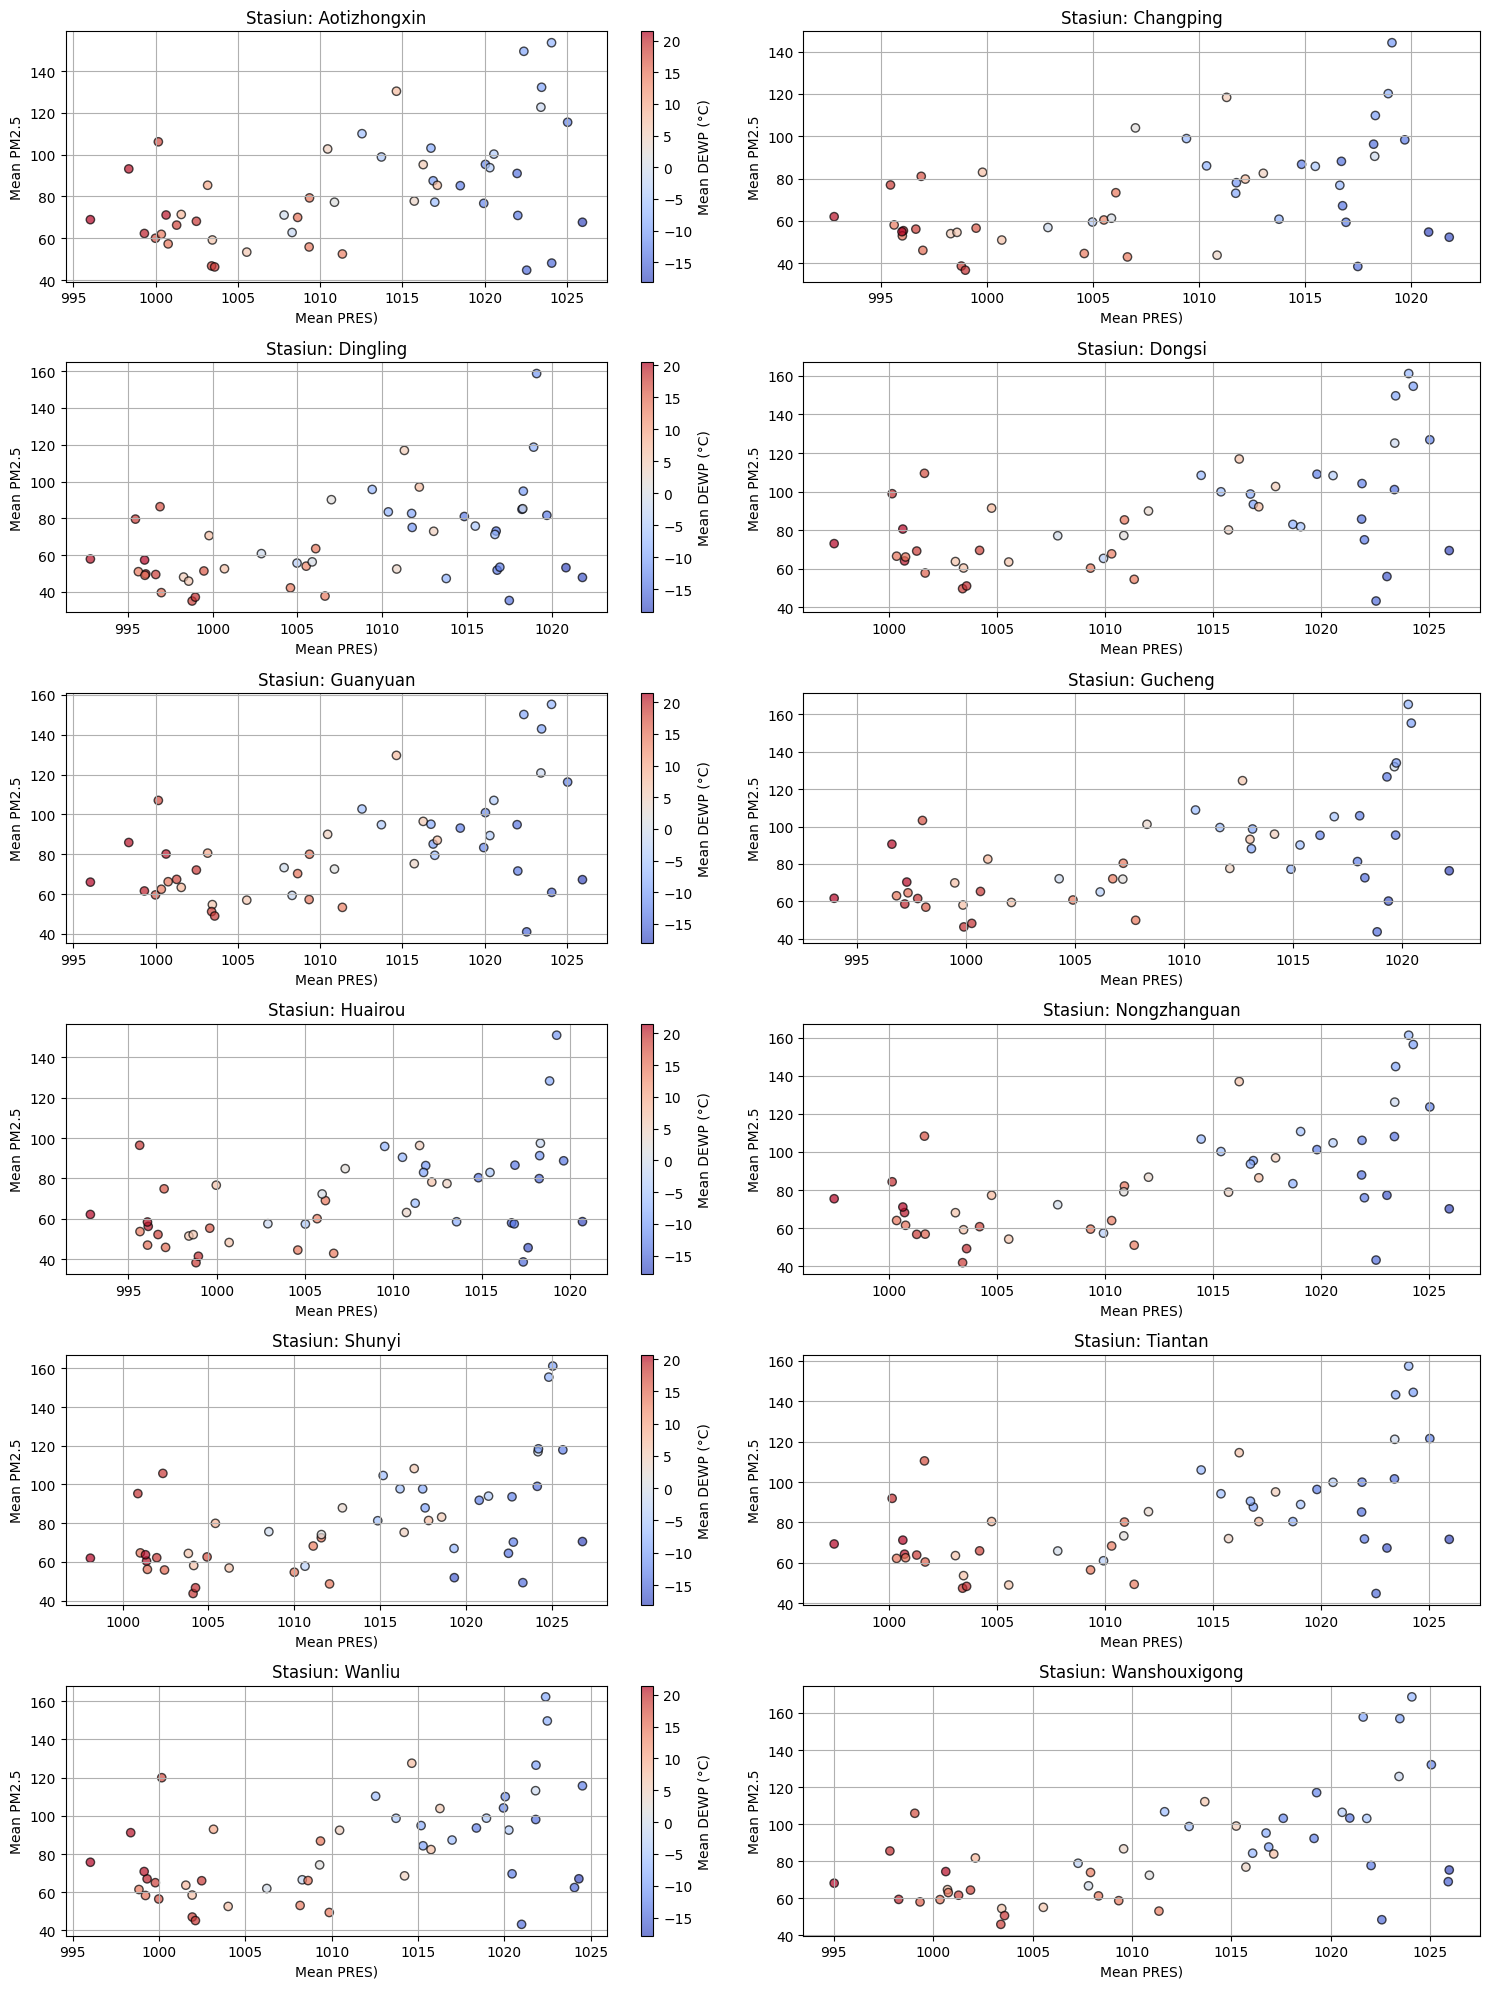

In [86]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (station, data) in enumerate(stasiun.items()):
    agg_data = data.groupby(["year", "month"]).agg({
        "PM2.5": "mean",
        "PRES": "mean",
        "DEWP": "mean"
    }).reset_index()

    sc = axes[i].scatter(agg_data["PRES"], agg_data["PM2.5"],
                         c=agg_data["DEWP"], cmap='coolwarm', alpha=0.7, edgecolors='k')

    axes[i].set_title(f"Stasiun: {station}")
    axes[i].set_xlabel("Mean PRES)")
    axes[i].set_ylabel("Mean PM2.5")
    axes[i].grid(True)

    if i % 2 == 0:
        cbar = plt.colorbar(sc, ax=axes[i])
        cbar.set_label("Mean DEWP (°C)")

plt.tight_layout()
plt.show()


**Insights:**
- Kalau dilihat secara sekilas untuk semua  stasiun, bahwa semakin rendah titik embun (DEWP titik warna biru) maka semakin tinggi PM2.5, ini sejalan dengan tabel korelasi pada EDA. Kemudian untuk PRES dapaat dilihat polanya tidak linear, walaupun ada beberapa data dimana PRES tinggi maka PM tinggi, tetapi berdasarkan grafik bisa dilihat kalau Semakin tinggi pressure, semakin tinggi PM, walaupun belum diuji secara statistik, walaupun bertolak belakang pada tabel korelasi di EDA, dimana PRES itu memiliki nilai korelasi dengan PM2.5 itu tidak konsisten di setiap stasiunnya, dan juga nilainya kecil.

## Analisis Lanjutan (Opsional)

In [87]:
kualitasudara = {}

for i, (station, data) in enumerate(stasiun.items()):
    scaler = MinMaxScaler()
    data[["SO2", "NO2", "CO", "O3"]] = scaler.fit_transform(data[["SO2", "NO2", "CO", "O3"]])
    agg_data = data.groupby(["year", "month"]).agg({
        "PM2.5": "mean",
        "PM10": "mean",
        "SO2": "mean",
        "NO2": "mean",
        "CO": "mean",
        "O3": "mean",
        "RAIN": "mean",
        "TEMP": "mean",
        "PRES": "mean",
        "DEWP": "mean"
    }).reset_index()
    agg_data["date"] = pd.to_datetime(agg_data[["year", "month"]].assign(day=1))

    kualitasudara[station] = agg_data

df_kualitasudara = pd.concat(kualitasudara, names=["station"]).reset_index()

df_kualitasudara.to_csv("kualitas.csv", index=False)


Analisis ARIMA untuk Aotizhongxin
ADF Statistic: -5.1980133578108525
p-value: 8.874564610901884e-06
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=566.495, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=471.037, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=518.981, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=472.279, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=451.211, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=453.429, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=449.130, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=449.832, Time=1.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=448.034, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=446.534, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=445.884, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=446.173, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=446.849, Time=0.25 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.709 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -219.942
Date:                Thu, 06 Mar 2025   AIC                            445.884
Time:                        04:59:33   BIC                            451.498
Sample:                    03-01-2013   HQIC                           448.005
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7838      6.341     1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


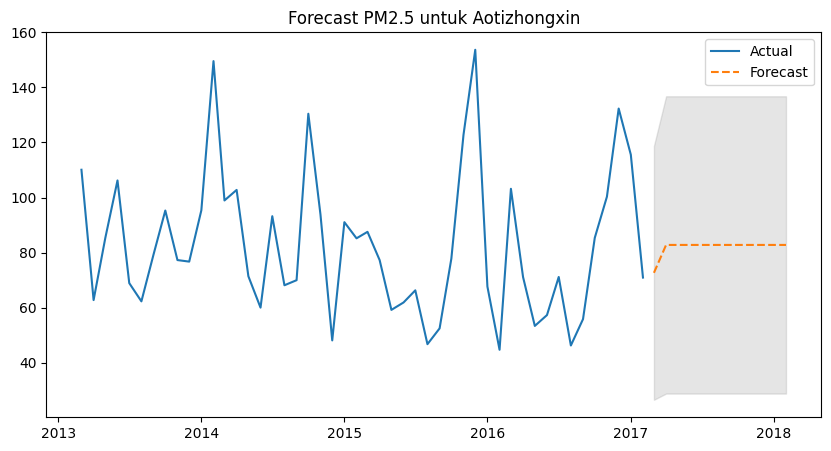

Analisis ARIMA untuk Changping
ADF Statistic: -4.941973597016186
p-value: 2.8874525540700905e-05
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=552.525, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=459.759, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=510.691, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=459.910, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=452.365, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=447.599, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=495.696, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=449.359, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=442.797, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=440.780, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=439.126, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=443.759, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=440.764, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=440.934, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.478 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -216.563
Date:                Thu, 06 Mar 2025   AIC                            439.126
Time:                        04:59:34   BIC                            444.740
Sample:                    03-01-2013   HQIC                           441.248
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


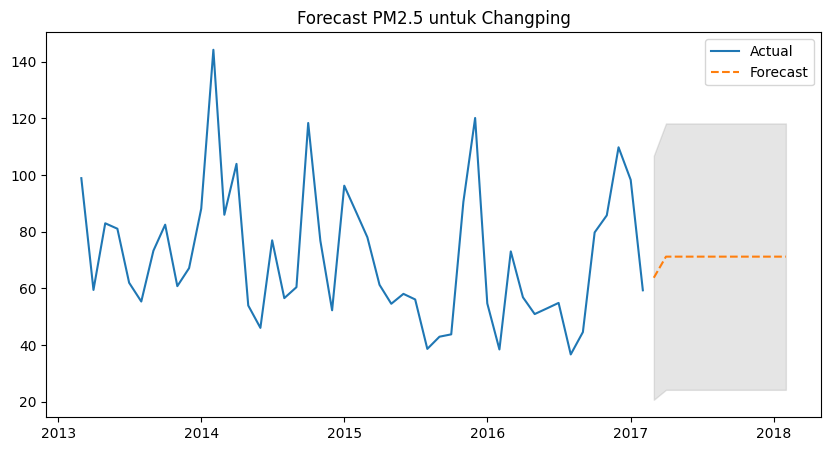

Analisis ARIMA untuk Dingling
ADF Statistic: -5.5824405322258785
p-value: 1.386791663562093e-06
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=547.775, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=469.684, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=510.871, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=468.840, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=464.162, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(4,0,0)(0,0,0)[0]             : AIC=465.656, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=449.623, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=447.681, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=447.316, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=447.144, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=446.357, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=447.199, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=447.009, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=449.077, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 2.044 seconds
Model terbaik: ARIMA(0, 0, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -220.179
Date:                Thu, 06 Mar 2025   AIC                            446.357
Time:                        04:59:37   BIC                            451.971
Sample:                    03-01-2013   HQIC                           448.479
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0232      5.994     11.182      0.000      55.276      78.770
ma.L1          0.2993      0.192      1.555      0.120      -0.078       0.677
sigma2       563.5637    107.803      5.228      0.0

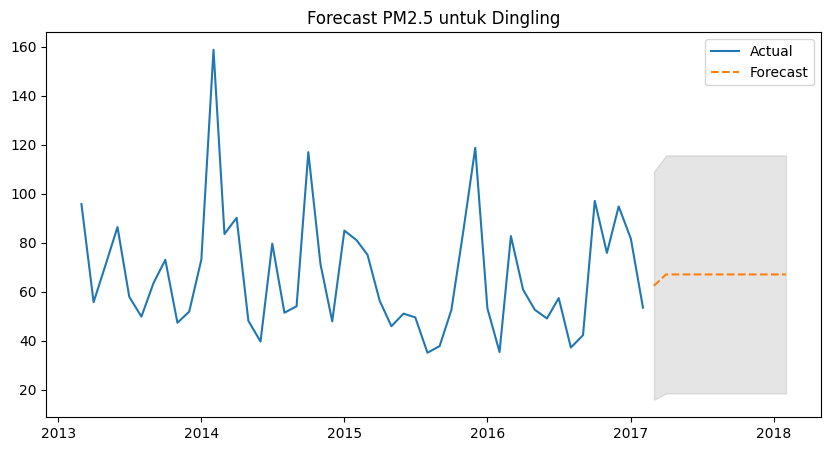

Analisis ARIMA untuk Dongsi
ADF Statistic: -5.449310419863936
p-value: 2.6664216444352917e-06
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=570.528, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=472.119, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=473.906, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=472.005, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=463.377, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=465.326, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=466.423, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=450.198, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=449.124, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=453.271, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=447.699, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=446.264, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=445.342, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=456.609, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=445.893, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=444.447, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=449.588, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=447.002, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=447.091, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.113 seconds
Model terbaik: ARIMA(1, 0, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -217.179
Date:                Thu, 06 Mar 2025   AIC                            444.358
Time:                        04:59:40   BIC                            453.714
Sample:                    03-01-2013   HQIC                           447.893
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8063      1.333     63.640      0.000      82.194      87.418
ar.L1          0.7218      0.174      4.153      0.000       0.381       1.062
ma.L1         -0.2537     23.990     -0.011      0.9

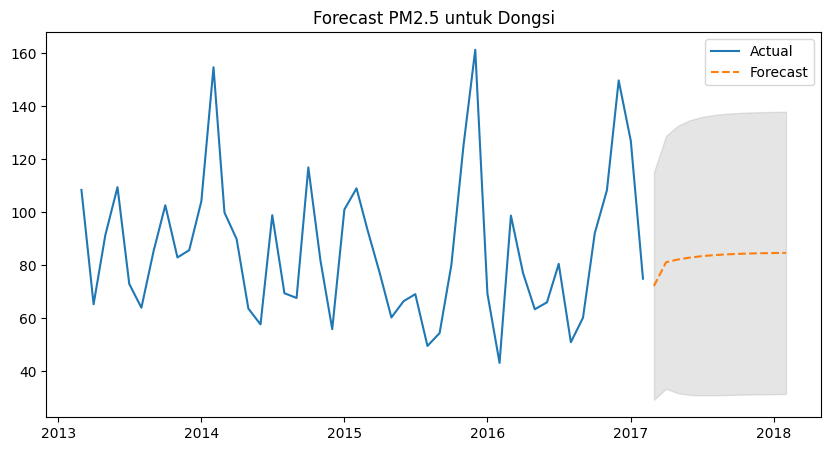

Analisis ARIMA untuk Guanyuan
ADF Statistic: -5.385229731573132
p-value: 3.6377488468062054e-06
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=566.820, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=468.774, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=520.706, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=470.454, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=470.850, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=449.684, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=452.800, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=446.119, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=447.140, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=445.861, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=444.927, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=443.434, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=444.642, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=443.037, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=447.878, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=446.523, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=444.791, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=447.067, Time=1.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.74 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 5.312 seconds
Model terbaik: ARIMA(1, 0, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -216.474
Date:                Thu, 06 Mar 2025   AIC                            442.947
Time:                        04:59:46   BIC                            452.303
Sample:                    03-01-2013   HQIC                           446.483
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9876      1.499     54.695      0.000      79.050      84.926
ar.L1          0.7518      0.182      4.133      0.000       0.395       1.108
ma.L1         -0.3538     14.853     -0.024      0.9

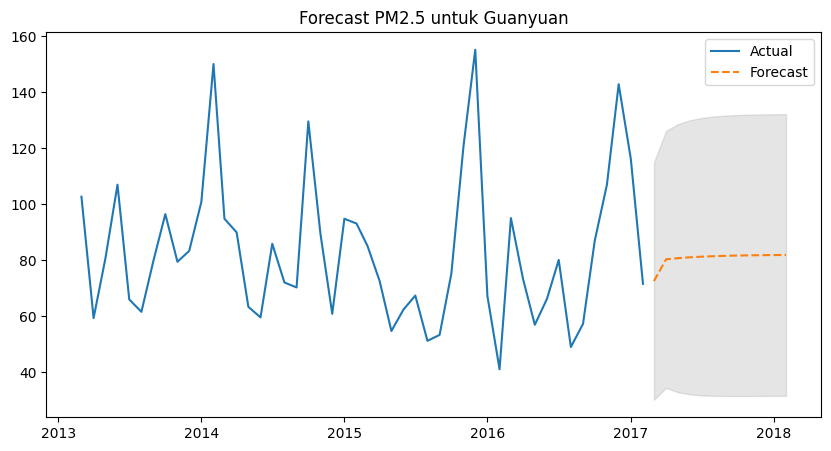

Analisis ARIMA untuk Gucheng
ADF Statistic: -5.0588583045540165
p-value: 1.695035547497758e-05
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=568.547, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=470.257, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=472.093, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=471.171, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=453.067, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=458.065, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=450.093, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=451.192, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=448.903, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=447.341, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=445.668, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=447.240, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.648 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -219.834
Date:                Thu, 06 Mar 2025   AIC                            445.668
Time:                        04:59:48   BIC                            451.281
Sample:                    03-01-2013   HQIC                           447.789
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.1988      6.595     12.76

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


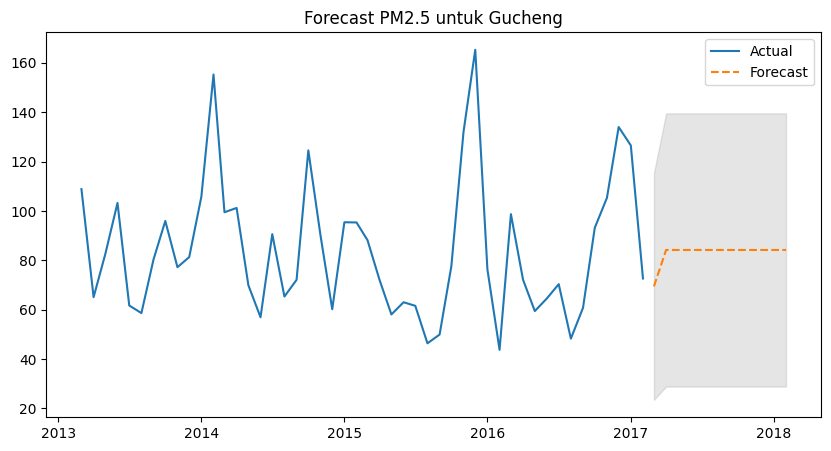

Analisis ARIMA untuk Huairou
ADF Statistic: -4.953659528910989
p-value: 2.7389540691010297e-05
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=550.326, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=457.495, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=458.354, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=449.081, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=495.724, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.978 seconds
Model terbaik: ARIMA(1, 0, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -212.259
Date:                Thu, 06 Mar 2025   AIC                            432.518
Time:                        04:59:50   BIC                            440.003
Sample:                    03-01-2013   HQIC                           435.346
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5421      4.755     14.625      0.000      60.222      78.862
ar.L1         -0.4860      0.177     -2.746      0.006      -0.833      -0.139
ma.L1          0.9995     13.970      0.072      0.9

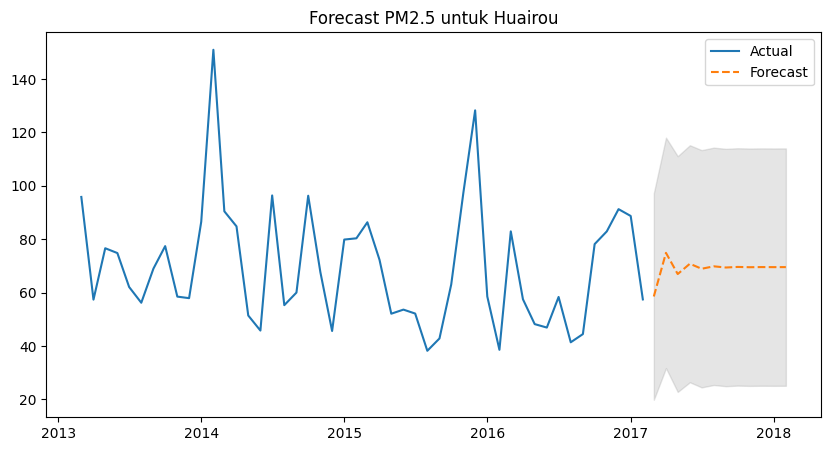

Analisis ARIMA untuk Nongzhanguan
ADF Statistic: -4.125313339277268
p-value: 0.0008793074366880039
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=569.891, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=471.037, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=520.778, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=472.953, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=472.103, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=471.021, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=465.628, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=464.523, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=466.370, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=467.168, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=452.824, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=451.957, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=454.843, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=449.765, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=448.029, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=446.211, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=461.251, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=447.990, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=449.923, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.815 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -220.105
Date:                Thu, 06 Mar 2025   AIC                            446.211
Time:                        04:59:52   BIC                            451.824
Sample:                    03-01-2013   HQIC                           448.332
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


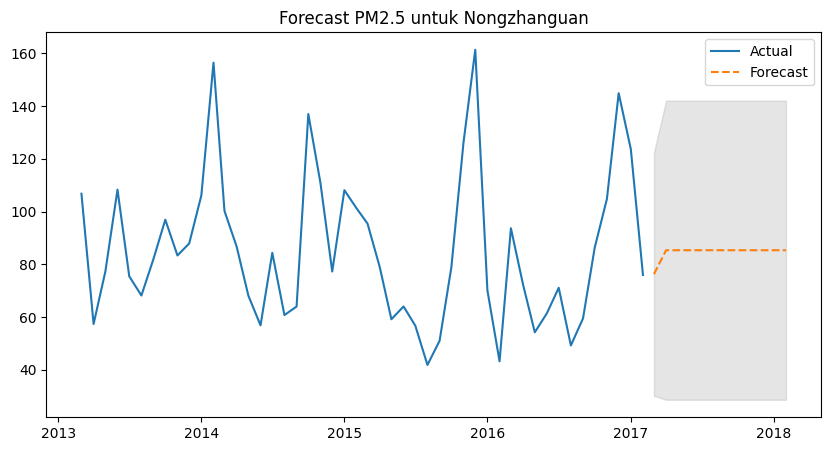

Analisis ARIMA untuk Shunyi
ADF Statistic: -5.225959425764847
p-value: 7.780227068929755e-06
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=563.099, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=469.065, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=470.450, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=449.623, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=452.179, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=447.186, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=448.691, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=449.523, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=444.902, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=444.433, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=444.656, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=442.336, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=448.680, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=445.829, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.535 seconds
Model terbaik: ARIMA(1, 0, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn(

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -216.134
Date:                Thu, 06 Mar 2025   AIC                            442.268
Time:                        04:59:55   BIC                            451.624
Sample:                    03-01-2013   HQIC                           445.803
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8222      1.484     53.116      0.000      75.914      81.731
ar.L1          0.6741      0.185      3.636      0.000       0.311       1.037
ma.L1         -0.3134     15.628     -0.020      0.9

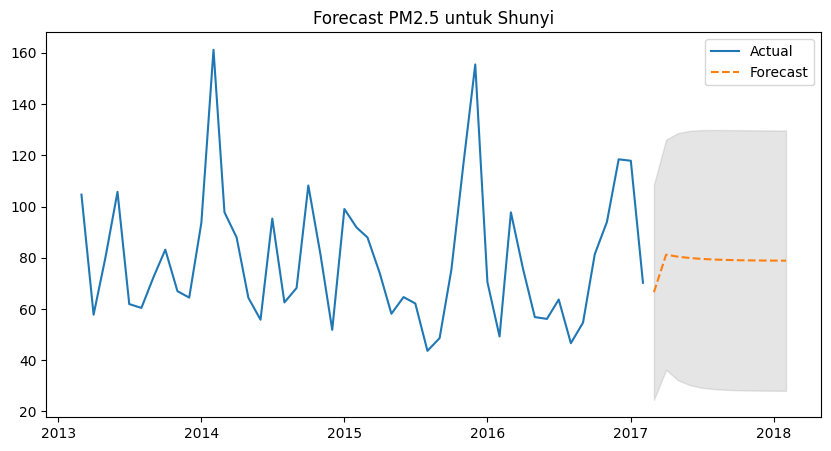

Analisis ARIMA untuk Tiantan
ADF Statistic: -5.115487852535971
p-value: 1.3047781388828847e-05
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=565.905, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=465.107, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=516.576, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=466.973, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=465.437, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=447.784, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=452.799, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=444.474, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=445.008, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=442.629, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=441.156, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=439.490, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=441.046, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=440.306, Time=0.81 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.922 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -216.745
Date:                Thu, 06 Mar 2025   AIC                            439.490
Time:                        05:00:00   BIC                            445.104
Sample:                    03-01-2013   HQIC                           441.611
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.2374      6.130     1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


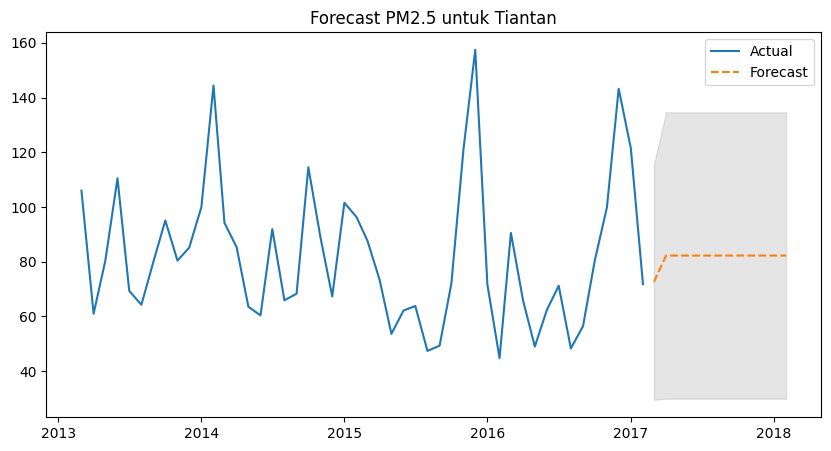

Analisis ARIMA untuk Wanliu
ADF Statistic: -4.661666434458395
p-value: 9.927081830898096e-05
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=458.421, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=567.761, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=469.503, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=522.794, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=456.703, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=505.434, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=464.463, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=458.406, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=499.336, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=452.032, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=450.000, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=448.335, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=456.446, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=450.011, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=451.965, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.671 seconds
Model terbaik: ARIMA(0, 0, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loca

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -221.167
Date:                Thu, 06 Mar 2025   AIC                            448.335
Time:                        05:00:02   BIC                            453.948
Sample:                    03-01-2013   HQIC                           450.456
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.6367      6.413     13.041      0.000      71.067      96.207
ma.L1          0.5489      0.148      3.707      0.000       0.259       0.839
sigma2       584.0413    131.963      4.426      0.0

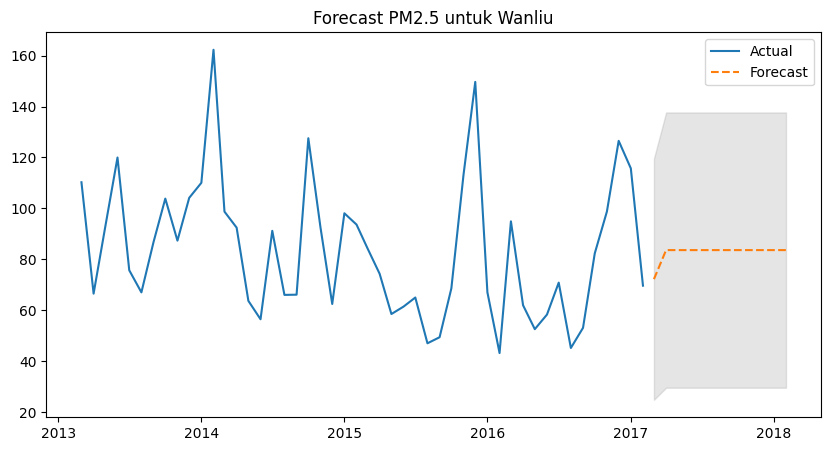

Analisis ARIMA untuk Wanshouxigong
ADF Statistic: -4.740823509585718
p-value: 7.048405127535084e-05
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=570.020, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=468.176, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=470.174, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=470.159, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=470.081, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=453.571, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=462.549, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=450.567, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=452.275, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=451.434, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=449.669, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=447.722, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=449.656, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=451.665, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.499 seconds
Model terbaik: ARIMA(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -220.861
Date:                Thu, 06 Mar 2025   AIC                            447.722
Time:                        05:00:04   BIC                            453.336
Sample:                    03-01-2013   HQIC                           449.843
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.1294      6.803     1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


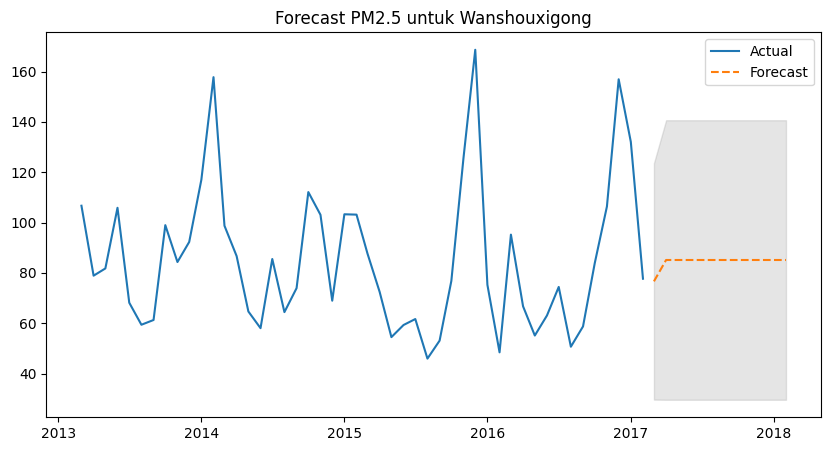

In [88]:
arima_forecasts = {}


for station, df in kualitasudara.items():
    print(f"Analisis ARIMA untuk {station}")

    ts = df.set_index("date")["PM2.5"]

    adf_test = adfuller(ts.dropna())
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")

    auto_model = auto_arima(ts.dropna(), seasonal=False, stepwise=True, trace=True)
    order = auto_model.order
    print(f"Model terbaik: ARIMA{order}")

    arima_model = sm.tsa.ARIMA(ts, order=order)
    arima_result = arima_model.fit()

    print(arima_result.summary())

    forecast = arima_result.get_forecast(steps=12)
    forecast_ci = forecast.conf_int()
    forecast_index = forecast.predicted_mean.index

    arima_forecasts[station] = pd.DataFrame({
        "date": pd.concat([ts.index.to_series(), pd.Series(forecast_index)]).reset_index(drop=True),
        "actual": pd.concat([ts, pd.Series([np.nan] * len(forecast_index), index=forecast_index)]).reset_index(drop=True),
        "forecast": pd.concat([pd.Series([np.nan] * len(ts)), forecast.predicted_mean]).reset_index(drop=True)
    })


    plt.figure(figsize=(10, 5))
    plt.plot(ts, label="Actual")
    plt.plot(forecast.predicted_mean, label="Forecast", linestyle="--")
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="gray", alpha=0.2)
    plt.legend()
    plt.title(f"Forecast PM2.5 untuk {station}")
    plt.show()


In [89]:
df_forecast = pd.concat(arima_forecasts, names=["station"]).reset_index()
df_forecast.to_csv("forecast.csv", index=False)

**Insight:**
Menerapkan Model ARIMA untuk setiap stasiun
- Stasiun Aotizhongxin mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Changping mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Dingling mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Dongsi mempunyai model terbaik ARIMA (1,0,2)
- Stasiun Guanyuan mempunyai model terbaik ARIMA (1,0,2)
- Stasiun Gucheng mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Huairou mempunyai model terbaik ARIMA (1,0,1)
- Stasiun Nongzhanguan mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Shunyi mempunyai model terbaik ARIMA (1,0,2)
- Stasiun Tiantan mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Wanliu mempunyai model terbaik ARIMA (0,0,1)
- Stasiun Wanshouxigong mempunyai model terbaik ARIMA (0,0,1)


## Conclusion

- Conclution pertanyaan 1
  - Tren Perubahan Kualitas Udara Parameter Konsentrasi Partikel (PM), menunjukkan bahwa tidak adanya Tren Peningkatan atau Penurunan jangka panjang setiap tahunnya. Hanya ada fluktuasi naik turun periode tahunan, dan polanya juga sama untuk setiap stasiun.
  - Tren Perubahan Kualitas Udara Parameter Konsentrasi Terkandung (SO2, NO2, CO, dan O3), untuk SO2 sendiri kalau dilihat ada perubahan tren menurun setiap tahunnya (perlu diuji statistik), fluktuasi tahunannya tidak ekstrim, hanya naik turun standar lah. Kemudian untuk NO2, CO, O3, tidak ada tren yang signifikan, hanya di titik situ aja. namun untuk fluktuasi tahunannya polanya sama setiap stasiun, tapi perubahan nhya berbeda.
- Conclution pertanyaan 2
  - Pengaruh antara Suhu Udara (TEMP), Tekanan Udara (PRES), Curah Hujan (RAIN), dan Titik embun (DEWP), dilihat dari grafik, bahwa semakin rendah TEMP (warna biru) semakin tinggi PM2.5, konsisten dengan tabel korelasi di EDA (bernilai negatif). Kemudian semakin rendah curah hujan (RAIN) semakin tinggi PM2.5, konsisten juga. Kemudian semakin rendah DEWP (warna biru) semakin tinggi PM2.5, konsisten juga. Sedangkan untuk PRES semakin tinggi PRES semakin tinggi PM2.5, walaupun secara visual keliatannya begitu, perlu di uji statistik juga, serta di tabel korelasi nilai PRES ini tidak konsisten, serta nilainya rendah.

